# *LIT THINK*

**PREDICTING APP SUCCESS USING GOOGLE PLAYSTORE DATA SET**

**Group Members**

Cynthia Chiuri - Scrum Master

Arnold Mochama - Data Understanding

Cleve Mwebi - EDA

Peter Kinyanjui - Feature engineering

Vivian Mosomi - Modeling

Mark Njagi - Modeling

**BUSINESS UNDERSTANDING**

#### Problem Statement:
   In the competitive landscape of the mobile app market, developers are constantly seeking ways to differentiate their apps and drive user engagement. 
   
   As of March 2024, there are approximately 3.55 million apps available on the Google Play Store while the Apple App Store has around 1.96 million apps available for download.

   The number of new apps released each year has grown substantially. In 2016, 2.4 million apps were published and in 2023, approximately 62 thousand mobile apps were released through the Google Play Store and 26.4 thousand on the Apple App Store. 
   
   It’s estimated that only 0.5% of apps are successful, meaning they get enough downloads and active users to be profitable. 
   
   Studies show that almost 68% of apps get below 1,000 downloads, nearly 18% get 1,000 or fewer active users, and another 7% close because they don’t see enough revenue.
   
   However, understanding what makes an app successful can be a complex task. This project aims to unravel this complexity by developing a classification model that identifies the key factors contributing to an app’s success on the Google Play Store.

#### Why should developers care? 
   The insights derived from this model will not only guide developers in creating apps that resonate with users but also help them make informed decisions about feature development, user interface design, and marketing strategies. By predicting an app’s success, developers can optimize resources, reduce risk, and increase the likelihood of their app’s success in the marketplace.

#### Business Context:

The Google Play Store hosts a vast number of mobile applications across various categories. Understanding the factors that influence app ratings and user preferences is crucial for app developers, marketers, and stakeholders.

#### Stakeholders:

1. App Developers:They want to create successful apps that receive high ratings and downloads.

2. Marketers: They need insights to promote apps effectively.

3. Google Play Store: The platform aims to provide a positive user experience and attract more users.

#### Key Objective.
1. To model for app success based on the number of installations using classification models.

#### Other Objectives.

2. To identifying factors influencing app popularity. 

3. To identify major app categories in the Play Store app.  

4. To assess the relationships between app related features.

5. To assist developers to allocate their resources effectively.

#### Metric of Success
Considering that our project is classification-based we considered a precision score of 85% and above as the metric of success.

**DATA UNDERSTANDING**

The [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps)  to the Kaggle data set:



The Google Play Store dataset contains 10841 rows and 13 columns of information about numerous apps available on the platform, including:

App name - The name of the mobile application

Category - The category the app belongs to E.g- Family, Education

Ratings - The user rating of the app.

Reviews - The number of reviews the app has received

Size - The size of the app in terms of storage space

Installs - Contains the installations count(The number of times the app has been installed)

Type - Whether the app is free or paid

Price - The Price of the app if it's not free

Content rating - The target audience or the age group for which the app is suitable

Genres - The specific category of the app, which is similar to the category columm

Last app update - The date when the app was last updated

Current app version - Current version number of the app

Android version - The minimum required android version to run the app

By analyzing this dataset, we can gain insights into the factors influencing app popularity, user engagement, and market trends within the Google Play Store ecosystem.

**Importing libraries needed**

In [82]:
# For data visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
%matplotlib inline

# For data preprocessing

from scipy import stats
from scipy.stats import uniform, randint
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split

# Importing models
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Importing evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, precision_score, accuracy_score

# To filter out warnings
import warnings
warnings.filterwarnings('ignore')


### 1. Data Understanding

Loading the Data

In [2]:
#Loading the dataset
data = pd.read_csv(r"C:\Users\dell\Documents\Arnold_Moringa_work\Phase_5_Capstone project\googleplaystore.csv")
data2 = data.copy()
data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Shape of the data

data2.shape

(10841, 13)

In [4]:
# Info of the data

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# Statistics of the data

data2.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# First five rows of the data

data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2. Data Cleaning

In [7]:
# Identifying the outlier row

data2[data2['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
# Dropping the above row

data2 = data2[data2['Category'] != '1.9']

The observation for the above row is that it has mismatched values hence we dropped it

In [9]:
# Checking for null values

data2.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [10]:
data2.dropna(subset=['Rating'],inplace=True)

We're dropping the missing values in the Rating column because we can't impute with values like mean or median as we would be interfering with the integrity of the column(Cause the ratings are true values)

In [11]:
data2.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [12]:
# Checking for duplicates

data2.loc[data2.duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device


In [13]:
# Dropping duplicates

data2.drop_duplicates(inplace=True)

In [14]:
data2.duplicated().sum()

0

In [15]:
data2.shape

(8892, 13)

From the above analysis, 876 duplicate values were found and dropped. The resulting dataset contains 8892 rows and 13 columns.

In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   object 
 4   Size            8892 non-null   object 
 5   Installs        8892 non-null   object 
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   object 
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8890 non-null   object 
dtypes: float64(1), object(12)
memory usage: 972.6+ KB


Checking for consistency of data types across columns


We begin with the Reviews column whose values should be numeric but are currently stored as objects

In [17]:
data2['Reviews'] = data2['Reviews'].astype('int64')

In the above code, we've converted the reviews column to an integer data type

### The size column

Dealing with Size column has two steps:

1. Changing the 'Varies with device' values to an agreed value - we decided to impute the values with 12Mb since it is the
   average size of most Android apps from research (From Chartboost)
2. Converting Mbs to kBs: 1MB = 1024 KB
3. Comverting Varies with device with 12,288kb

In [18]:
# Dealing with the size column.
def replace_MK_with_numbers(size):
    if 'M' in size:
        size = size.replace('M', '')
        return float(size) * 1024
    elif 'K' in size or 'k' in size:
        size = size.replace('K', '').replace('k', '')
        return float(size) * 1
    elif size == 'Varies with device':
        return 12288
    elif '+' in size:
        size = size.replace('+', '')
        size = size.replace(',', '') # remove comma
        return float(size)
    else:
        size = size.replace(',', '') # remove comma
        return float(size)

In [19]:
data2['Size'] = data2['Size'].apply(replace_MK_with_numbers)

In [20]:
# Renaming the Size column to Size(KB) for clarity

data2.rename(columns={'Size':'Size(KB)'},inplace=True)

In [21]:
data2['Size(KB)'].sample(20)

4114      5017.6
299      27648.0
1214      7270.4
7128      7372.8
1059     40960.0
1572      7270.4
7534     40960.0
8719     27648.0
4519     12288.0
2930     21504.0
8036     55296.0
6348      3686.4
1775     55296.0
6177     11264.0
78        2969.6
2096     96256.0
2134     59392.0
595      11264.0
10278     6041.6
9485     31744.0
Name: Size(KB), dtype: float64

In [22]:
# Changing the Price column to numeric

data2['Price'] = data2['Price'].str.replace('$', '').astype(float)

In [23]:
data2.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size(KB)          float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [24]:
data2.head()

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Changes the installs column by removing the + and the comma

In [25]:
# Converting to float and removing comma and plus

data2['Installs'] = data2['Installs'].astype(str)  # convert to string
data2['Installs'] = data2['Installs'].str.replace('+', '')
data2['Installs'] = data2['Installs'].str.replace(',', '')  # remove commas
data2['Installs'] = pd.to_numeric(data2['Installs'], errors='coerce')

In [26]:
# Checking the maximum and minimum values to determine the bin size

print(data2['Installs'].min(), data2['Installs'].max())

1 1000000000


In [27]:
data2.head(5)

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## EDA

### 1. Univariate Analysis

i) Plotting Counts of Categories

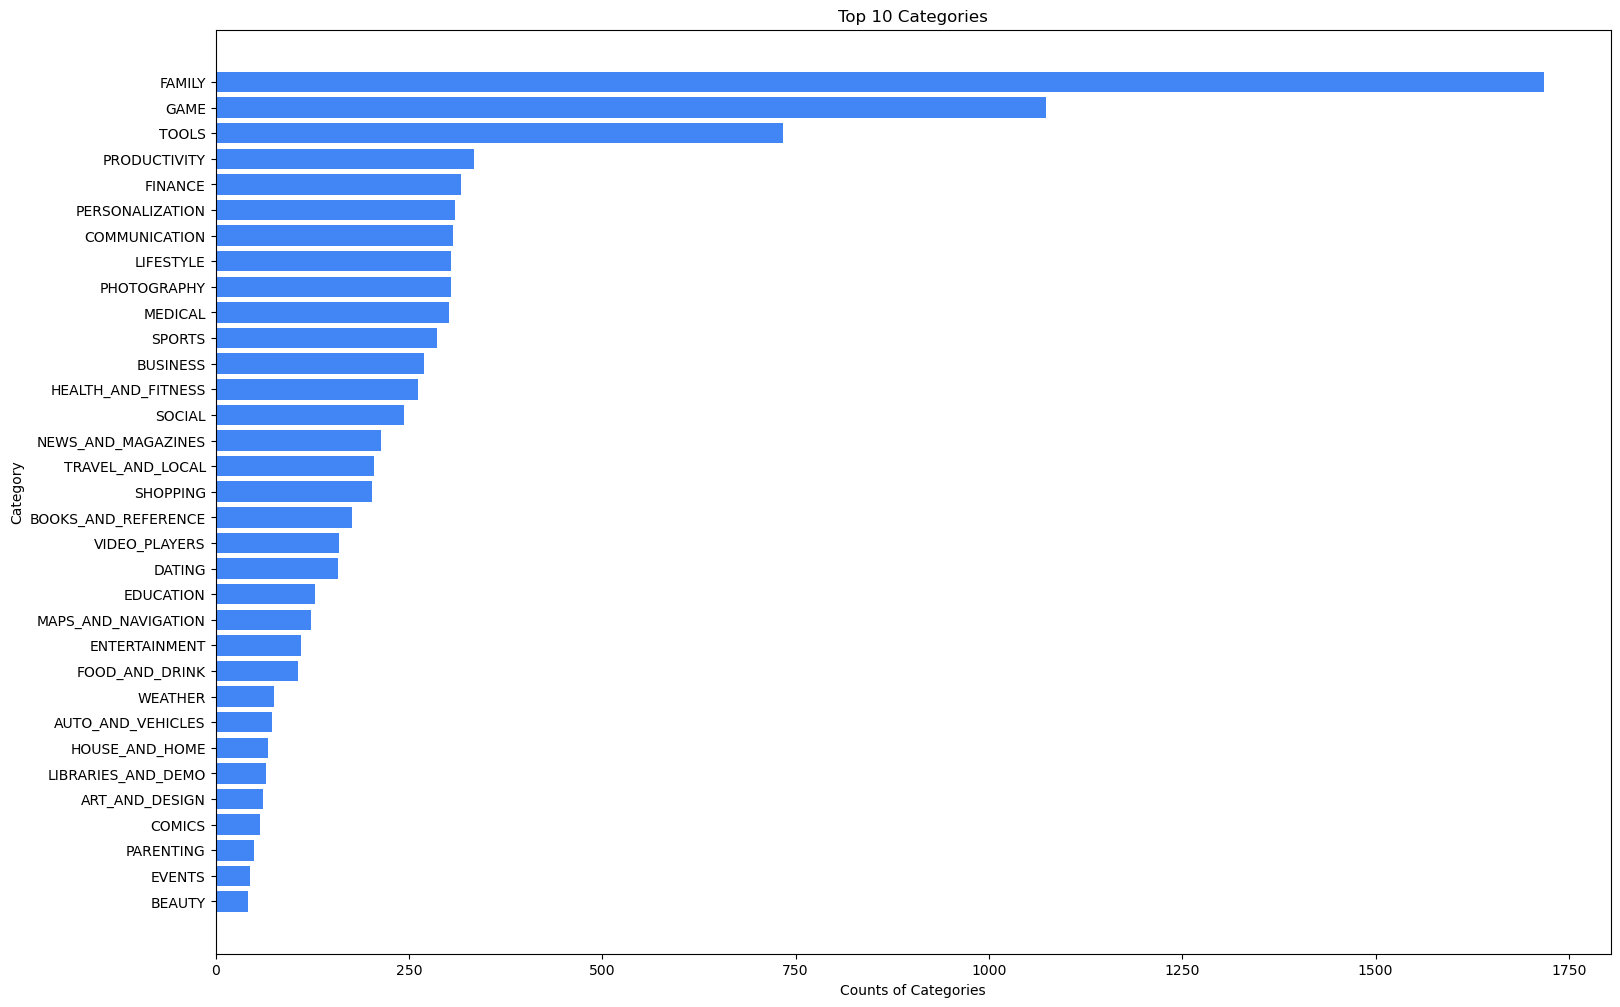

In [28]:
# Fetching top 20 categories
top_10_categories = data2['Category'].value_counts()

# Reverse the order of categories
top_10_categories = top_10_categories[::-1]

plt.figure(figsize=(18, 12))
plt.barh(top_10_categories.index, top_10_categories.values, color=sns.color_palette(["#4285F4"]))
plt.xlabel('Counts of Categories')
plt.ylabel('Category')
plt.title('Top 10 Categories')
plt.show()


Catergory Family has most application as well as category game then tools.

ii) Visualizing the Sizes of the Apps

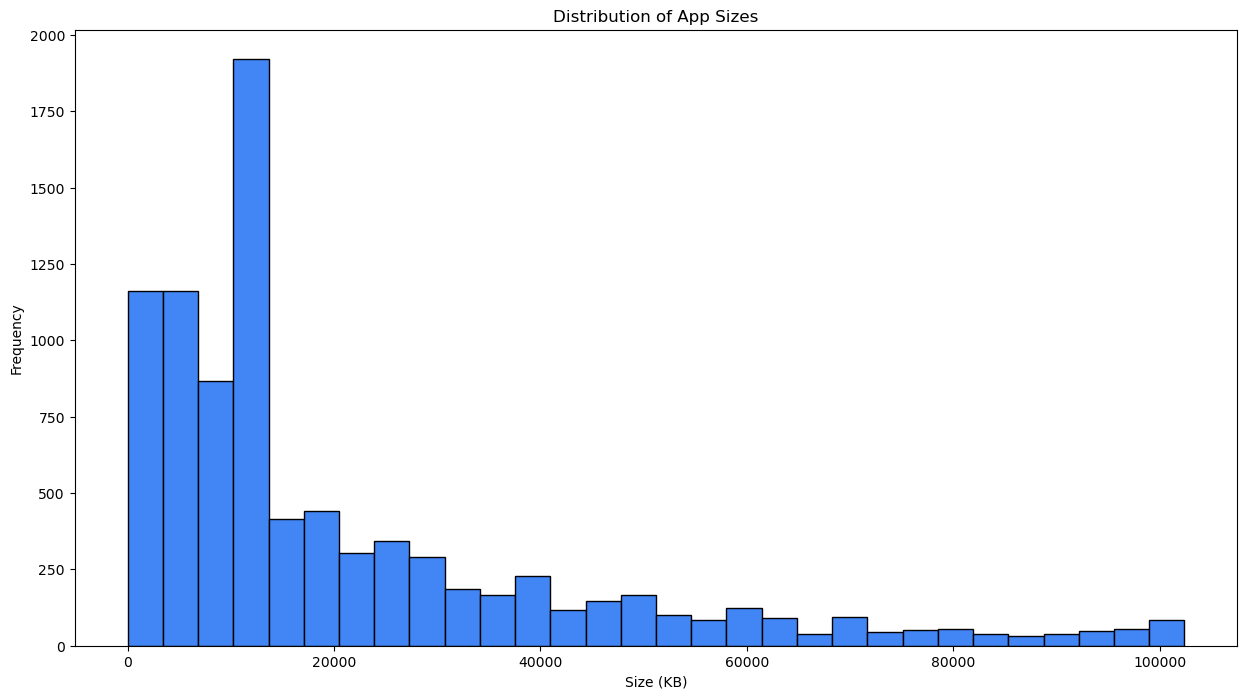

In [29]:
# Histogram showing Sizes of the Apps

plt.figure(figsize=(15, 8))
plt.hist(data2['Size(KB)'], bins=30, color=sns.color_palette(["#4285F4"]), edgecolor='black')
plt.xlabel('Size (KB)')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes')
plt.show()

Most of the intsalled apps are in the marked range from 0 to around (12MB). We observe that very few apps lie above 40,000KB (40MB) due to the high cost of running and developing the app. 

Developers should focus on optimizing code and resources to keep the app sizes minimal
This ensures faster downloads and smoother performance for end users


iii) Visualizing the App Types

App Types Using a Pie Chart

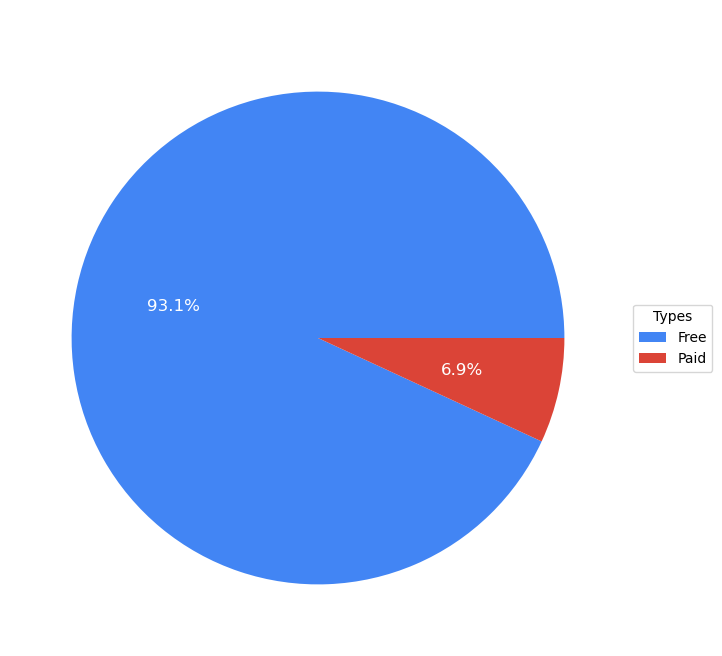

In [30]:
# Pie chart showing percentages of types

type_counts = data2['Type'].value_counts()
plt.figure(figsize=(15, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=["#4285F4","#DB4437"],textprops={'fontsize': 12, 'color': 'white'})
plt.legend(type_counts.index, title="Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage of App Install Types',color='white')
plt.show()

From the above pie chart, it is evident that 93.1%( approximately 10,092 of the 10,841 reviewed) are freely available to download from the Play Store. 

Since the market shows a greater inclination to free apps over paid apps, developers should consider other streams of revenue generation such as monetizing ads in the developed apps.

Since users are evidently less inclined to spend on apps, developers should ensure that the consumers derive maximum value for money from the apps, as well as reducing the overall cost of purchasing the apps.



iv) Pie Chart for content rating column

In [31]:
data2['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

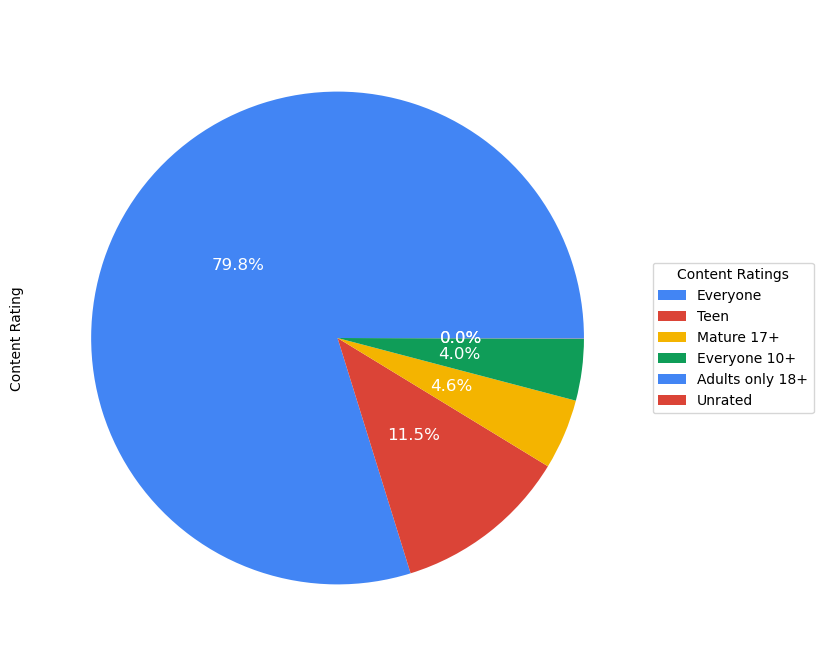

In [32]:
# Defining the color codes
colors = ["#4285F4", '#DB4437', '#F4B400', '#0F9D58']

# Plotting the pie chart
data2['Content Rating'].value_counts().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', pctdistance=0.5, textprops={'fontsize': 12, 'color': 'white'},colors=colors)

plt.title('Distribution of Content Ratings',color='white')
plt.legend(data2['Content Rating'].value_counts().index, title="Content Ratings", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


Most of the apps developed were rated for everyone at 80.9% , followed by teen at 11.2% while adults only had the least. This indicates a significant preference for apps designed for all age groups. Therefore, a developer should focus on creating an app that is suitable for all age groups as this appears to be the larger market. 

However, there is need for developers to undertake further extensive market research for each of the age groups identified above in order to address specific gaps per category.

### 2. Bivariate Analysis

i) Categories with the highest number of installs

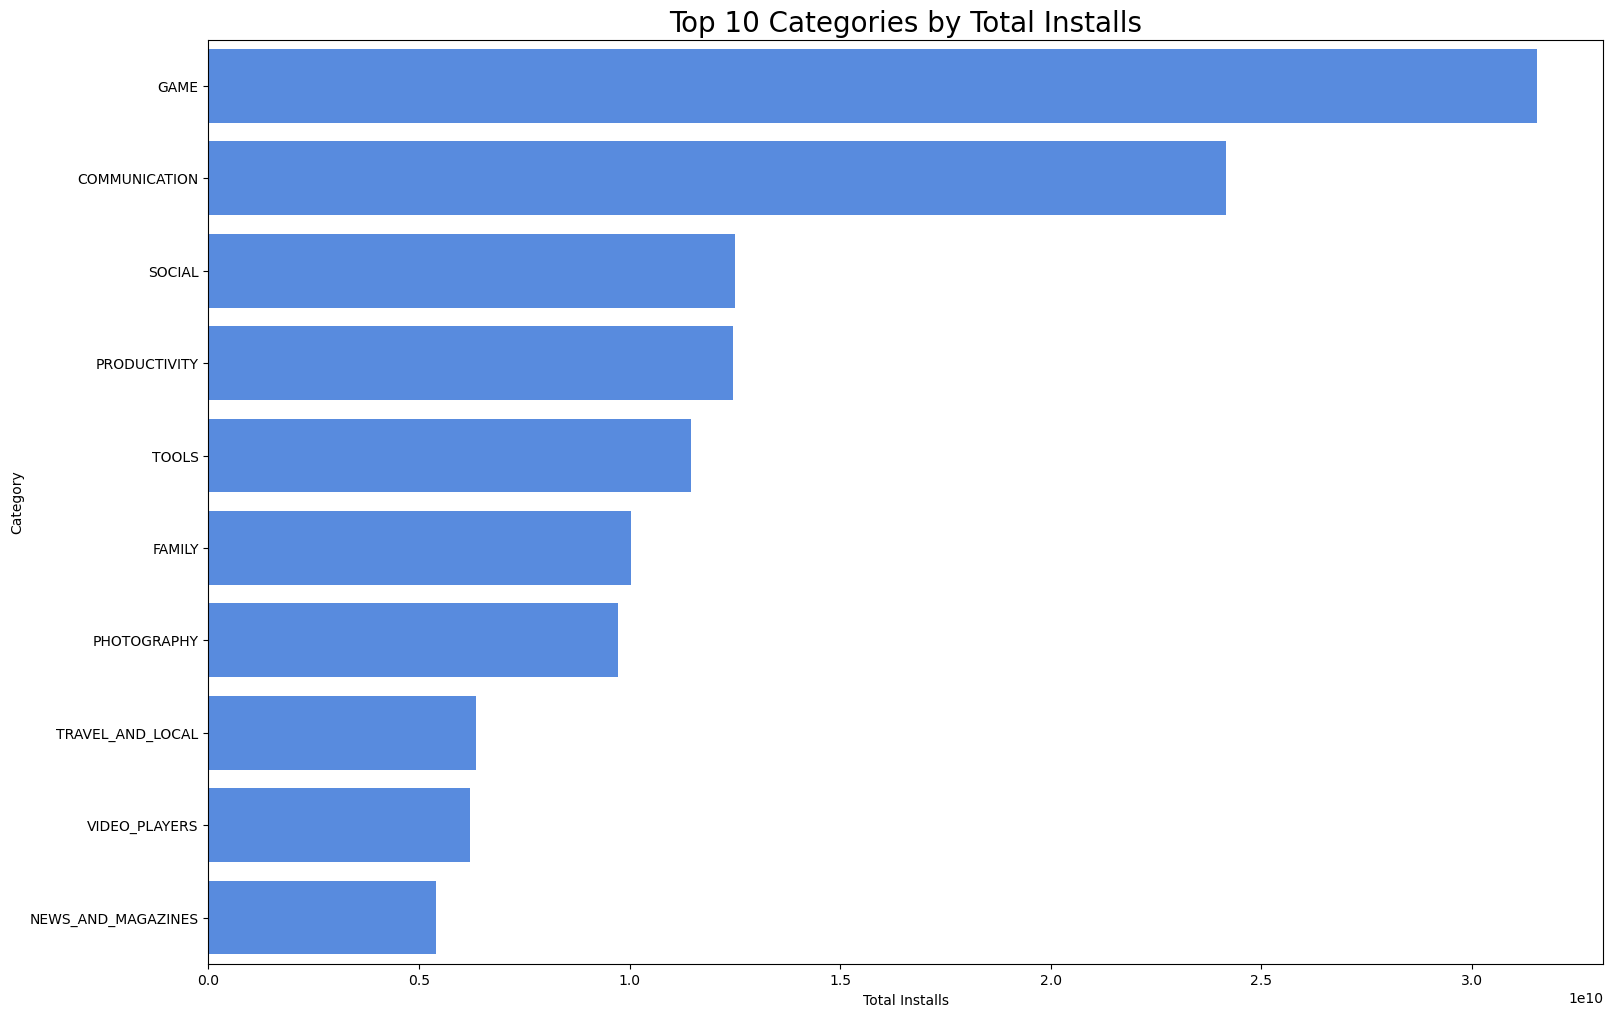

In [33]:
# Grouping Category and Installs
category_highest_installs = data2.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

# Create a horizontal bar plot
plt.figure(figsize=(18, 12))
sns.barplot(x=category_highest_installs.values, y=category_highest_installs.index, palette=sns.color_palette(["#4285F4"]))
plt.title("Top 10 Categories by Total Installs", size=20)
plt.xlabel("Total Installs")
plt.ylabel("Category")
plt.show()

From the above plot, Game Category has the most number of Installs, followed by Communication and Social. Developers should consider creating apps in these categories. This is because such apps could potentially lead to higher visibility and download due to the popularity and demand for these types of apps.

As for the unpopular apps, the developer should consider ways to boost popularity using various ways such as targeted marketing in order to boost number of installs.


ii) Distribution of Reviews by top 20 Categories

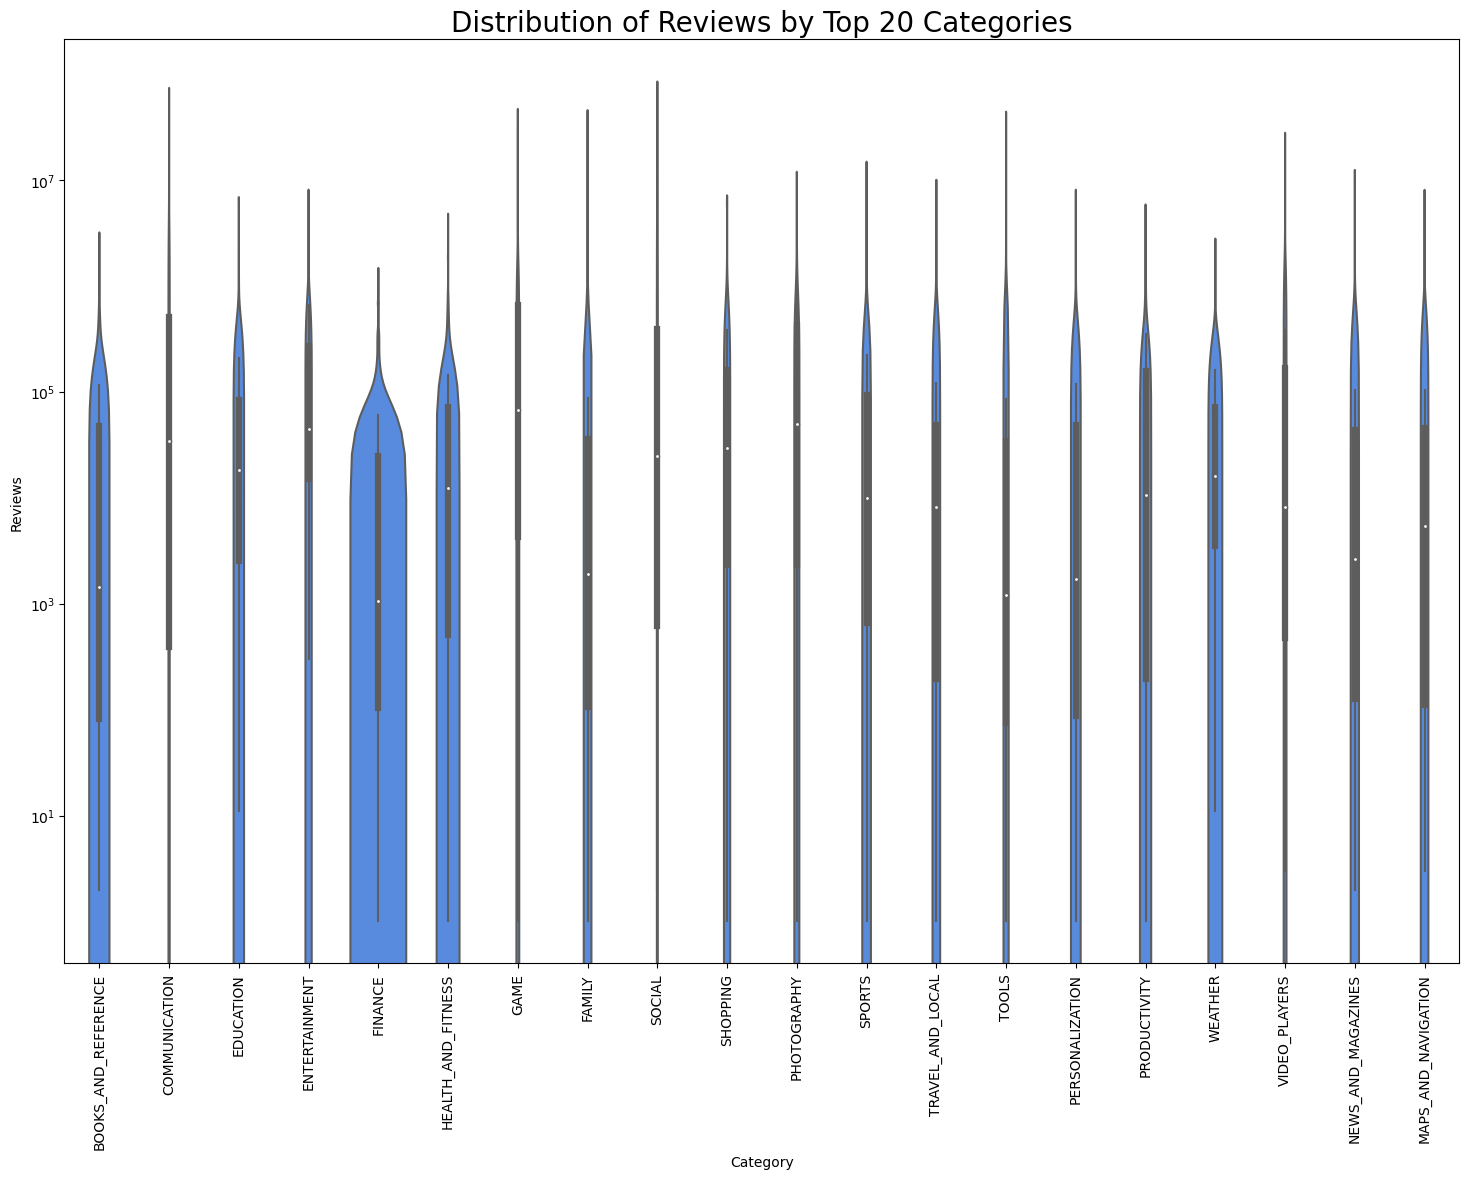

In [34]:
# Calculate the sum of reviews for each category
category_reviews = data2.groupby('Category')['Reviews'].sum()

# Sort the categories based on the sum of reviews and select the top 20
top_categories = category_reviews.sort_values(ascending=False).head(20).index

# Filter the data to include only the top 20 categories
data_top20 = data2[data2['Category'].isin(top_categories)]

# Plot the violin plot for the top 20 categories
plt.figure(figsize=(18, 12))
sns.violinplot(x='Category', y='Reviews', data=data_top20, palette=sns.color_palette(["#4285F4"]))
plt.title("Distribution of Reviews by Top 20 Categories", size=20)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.yscale("log")  # Use log scale for better visualization as it compresses the data.
plt.show()

For a violin plot, a thicker plot at the middle indicates that the majority/broader spred of the data points around that category.
Hence  the violin plot above, indicates that finance had the highest number of reviews followed by books and references then health and fitnesss.

Since Finances has the highest number of reviews yet doesn't have the most installs, developers should actively monitor and address user feedback (in form of reviews) inorder to improve customer satisfaction and potentially increase the number of installations. 

iii) Categories with highest and lowest ratings

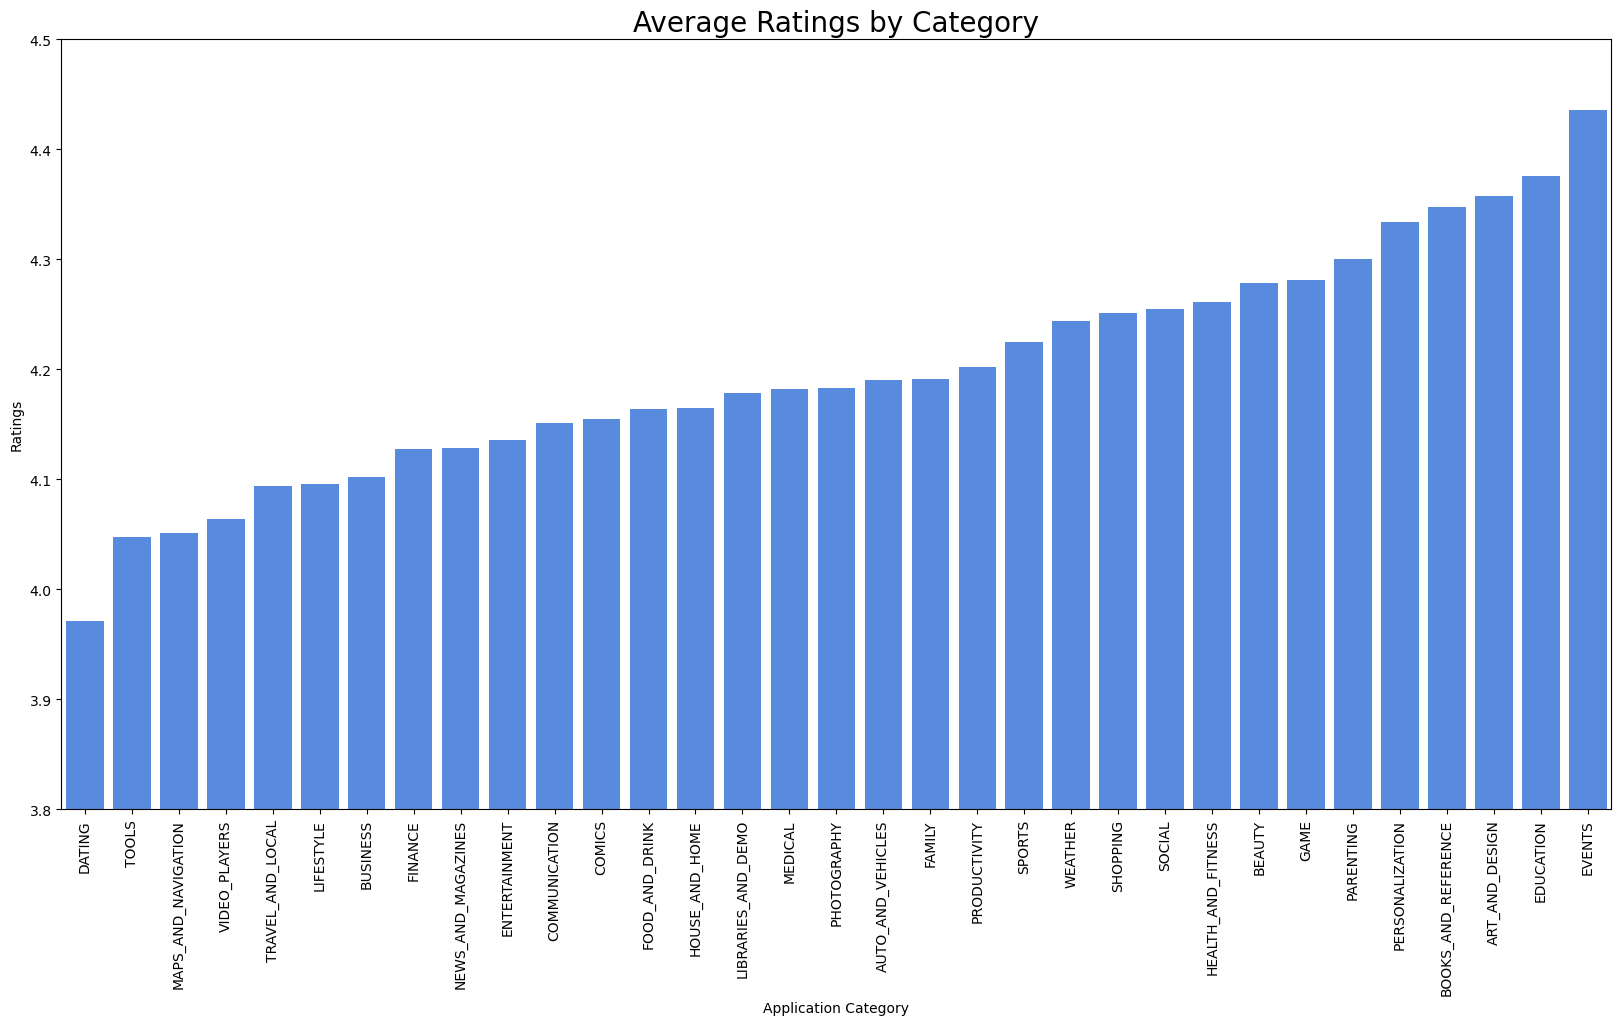

In [35]:
result = data2.groupby(["Category"])['Rating'].aggregate(np.mean).reset_index().sort_values('Rating')

plt.figure(figsize=(20,10))
sns.barplot(x=data2.Category, y=data2.Rating,ci=None,order=result['Category'],palette=sns.color_palette(["#4285F4"]))

plt.xticks(rotation = 90)
plt.ylim(3.8,4.5)
plt.xlabel('Application Category')
plt.ylabel('Ratings')
plt.title('Average Ratings by Category',size=20)
plt.show()

Events had the highest rating and dating the lowest.

With an average rating of 4.3 and above, categories like events, education and art and design, though higly rated, still have room for improvement. A developer seeking to create an app should leverage feedback (in form of reviews) and combine this with the strengths showcased by such apps to come up with an outstanding app.

With the low rated apps, such as dating, tools and maps and navigation, the developer should do the same as above in order to come up with an outstanding app.

iv) Top 10 highest and lowest rated apps

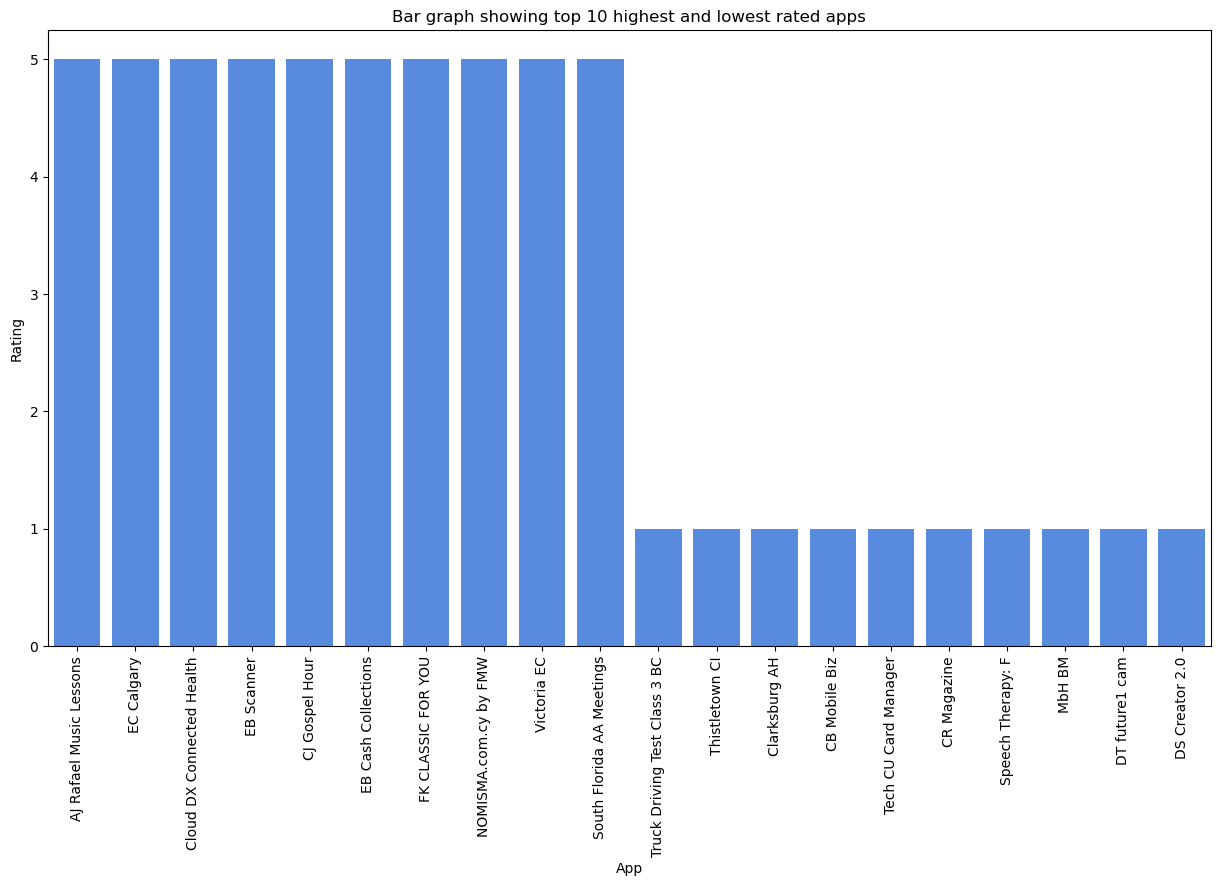

In [36]:
# Group by 'App' and calculate the mean rating for each app
app_ratings = data2.groupby('App')['Rating'].mean().reset_index()

# Sort by rating in descending order to get top 10 highest rated apps
top_10 = app_ratings.sort_values(by='Rating', ascending=False).head(10)

# Sort by rating in ascending order to get top 10 lowest rated apps
bottom_10 = app_ratings.sort_values(by='Rating', ascending=True).head(10)

# Concatenate the top and bottom 10 rated apps
df = pd.concat([top_10, bottom_10])

# Plot the bar graph
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.title('Bar graph showing top 10 highest and lowest rated apps')
sns.barplot(data=df, x='App', y='Rating', palette=sns.color_palette(["#4285F4"]), orient='v')
plt.show()


The top 3 highest rated apps are Dr Bk Sachin bhai, Clinic Doctor and EP Church Annapolis.
We noted that the highest rated apps whigot 5 while the lowest ranged below 1.

By examining the highest-rated apps, developers can benchmark their own apps against successful ones. They gain insights into what features, design elements, or functionalities contribute to positive user experiences.

v) Visualizing the App Size by Type of Install

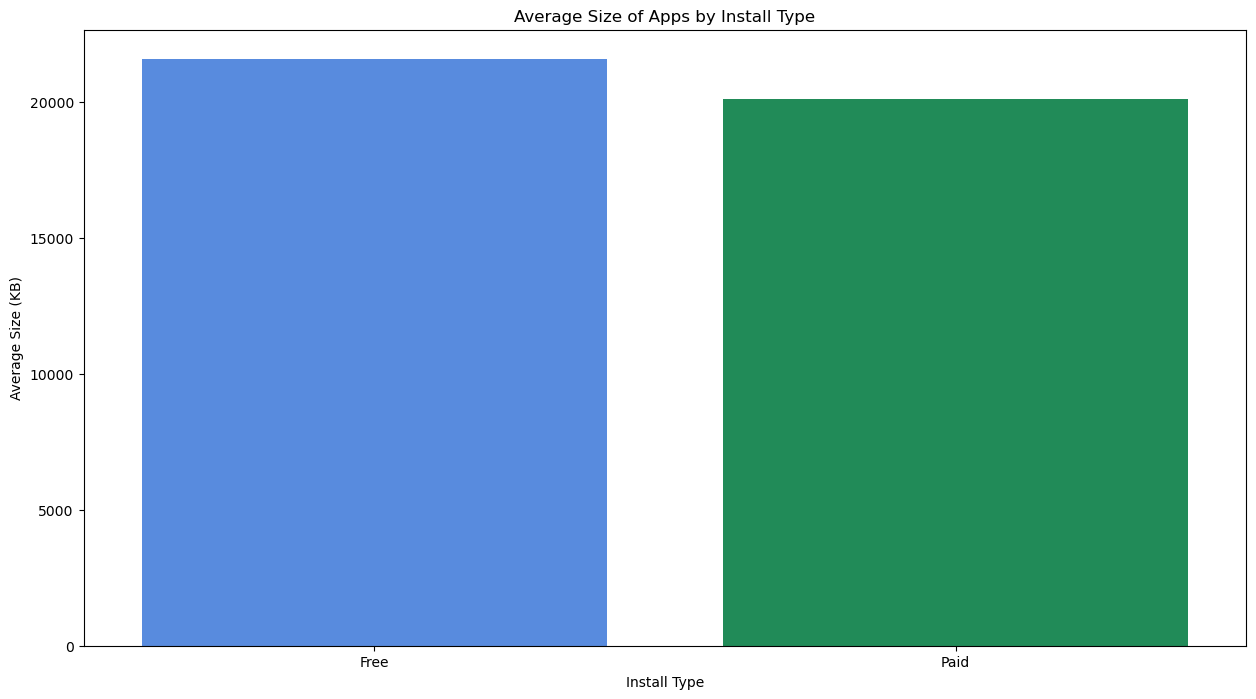

In [37]:
# Bar Plot showing average app size by type of install

avg_size_by_type = data2.groupby('Type')['Size(KB)'].mean().reset_index()
plt.figure(figsize=(15, 8))

# Specifying colors to use
colors = ["#4285F4","#0F9D58"]

sns.barplot(data=avg_size_by_type, x='Type', y='Size(KB)', palette=sns.color_palette(colors))
plt.xlabel('Install Type')
plt.ylabel('Average Size (KB)')
plt.title('Average Size of Apps by Install Type')
plt.show()

The average size of free apps was higher than the paid ones.

This insight suggests that developers of free apps may prioritize offering a richer user experience or including additional features to attract and retain users, potentially leading to larger file sizes. Conversely, developers of paid apps may focus more on optimizing app size while still delivering value to justify the purchase, resulting in slightly smaller average sizes. Understanding this relationship can inform developers' decisions regarding app development strategies, pricing models, and resource allocation to meet user expectations effectively.

vi) Visualizing Average Rating by Type

Average Rating for Free Apps: 4.182425413697307
Average Rating for Paid Apps: 4.2615008156606855


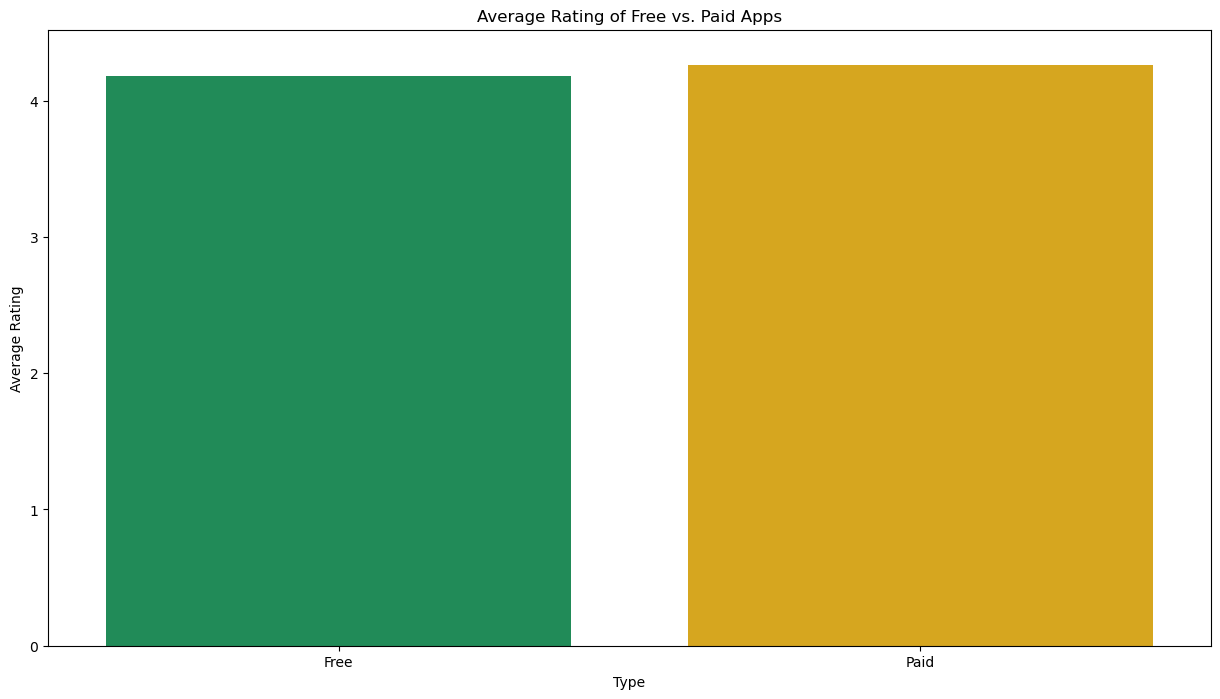

In [38]:
# Calculate average rating by Type
average_rating_by_type = data2.groupby('Type')['Rating'].mean()

# Print the average rating for Free and Paid apps
print("Average Rating for Free Apps:", average_rating_by_type['Free'])
print("Average Rating for Paid Apps:", average_rating_by_type['Paid'])

# visualizing the average rating for the types of installs
plt.figure(figsize=(15, 8))
colors = ["#0F9D58","#F4B400"]
sns.barplot(data=data2, x='Type', y='Rating', errwidth=0,palette=sns.color_palette(colors))
plt.title('Average Rating of Free vs. Paid Apps')
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.show()

We note that paid apps were rated higher.

From the above graph, it is observed that most paid apps were higher rated than free applications. While this difference is minimal, it may be attributable to a number of reasons; for example, most paid apps are ad-free, have a smaller user base, and provide more functionality than free apps leading to overall greater client satisfaction.
Developers should therefore strive to strike a balance between user experience, overall quality, and feedback implementation from ratings and reviews, regardless of the app monetization strategy.

vii) Visualizing average app size by category

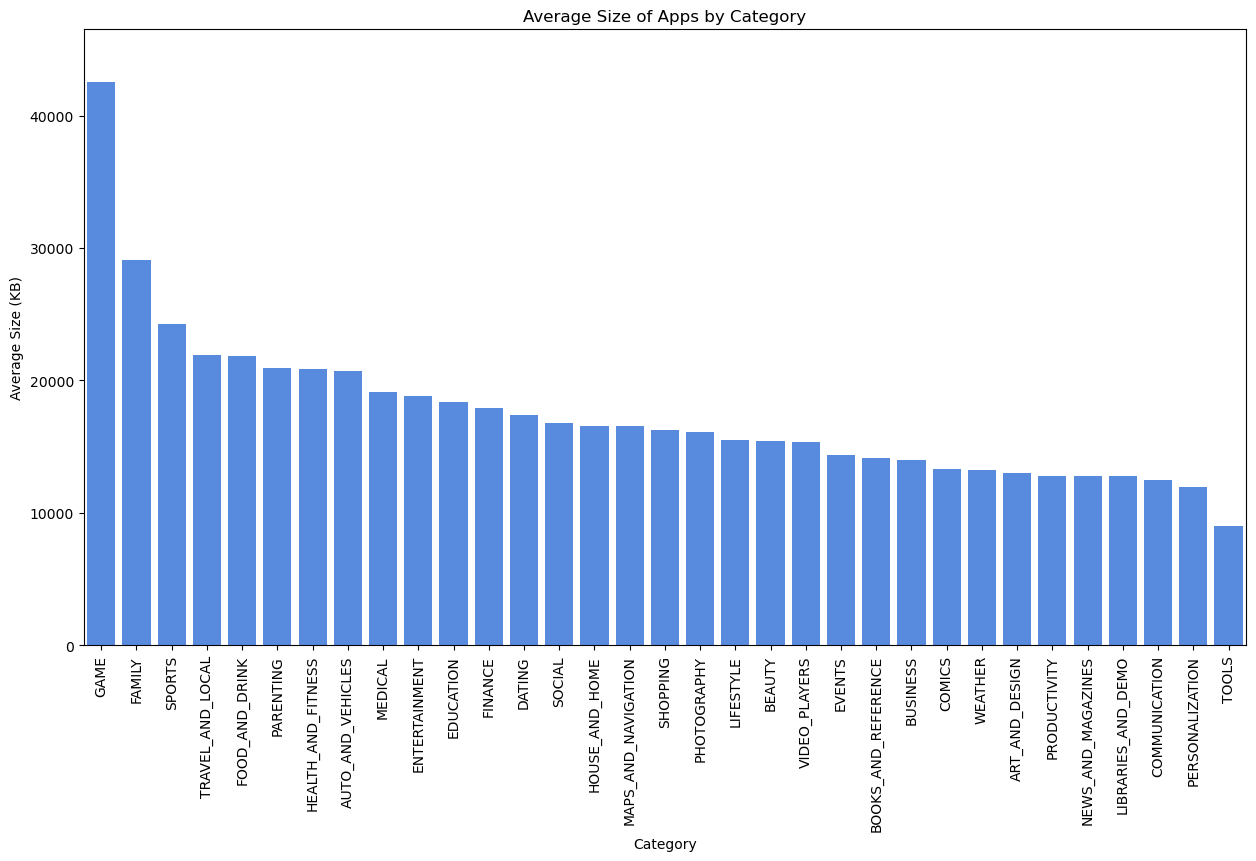

In [39]:
# Visualizing the average size of apps by category

plt.figure(figsize=(15, 8))
sns.barplot(data=data2, x='Category', y='Size(KB)', errwidth=0,
           order=data2.groupby('Category')['Size(KB)'].mean().sort_values(ascending=False).index,palette=sns.color_palette(["#4285F4"]))
plt.title('Average Size of Apps by Category')
plt.xlabel('Category')
plt.ylabel('Average Size (KB)')
plt.xticks(rotation=90)
plt.show()

Game, Family and Sports categories have higher averages sizes in KB, ranging from 20000 to 40000 KB.

The analysis of average app sizes by category reveals intriguing insights into user preferences and app development trends. Gaming apps emerge as the category with the largest average size, indicating a prevalence of high-quality graphics and multimedia content. Conversely, utility-focused categories like "TOOLS" boast smaller average sizes, reflecting a prioritization of functionality over multimedia elements. This variance underscores the diverse needs and expectations of users across different app categories. Developers may leverage these insights to optimize app sizes, balancing user expectations with resourse efficiency.

viii) Stacked Bar Chart for Content Rating of App Categories

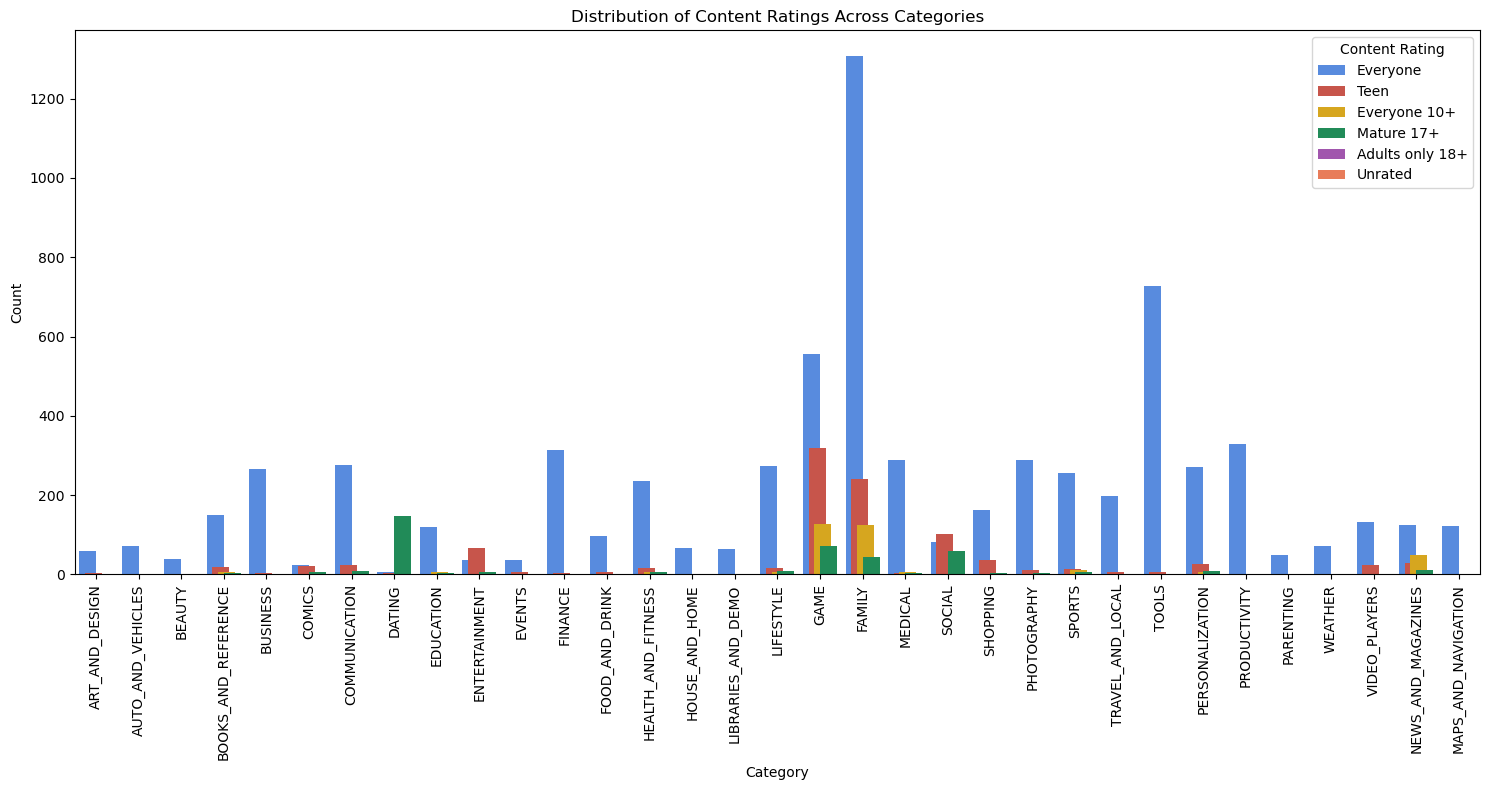

In [40]:
plt.figure(figsize=(15, 8))

# Colors
colors = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58', '#AB47BC', '#FF7043', '#9E9E9E']

sns.countplot(data=data2, x='Category', hue='Content Rating', palette=sns.color_palette(colors))
plt.xticks(rotation=90)
plt.title('Distribution of Content Ratings Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Content Rating')

# The line below is for adjusting the width of the bars so that they're not too thin
for patch in plt.gca().patches:
    patch.set_width(0.4)

plt.tight_layout()
plt.show()


The category that had the highest content rating was family,tools and game.

### 3. Multivariate Analysis

#### Plotting the correlation of columns

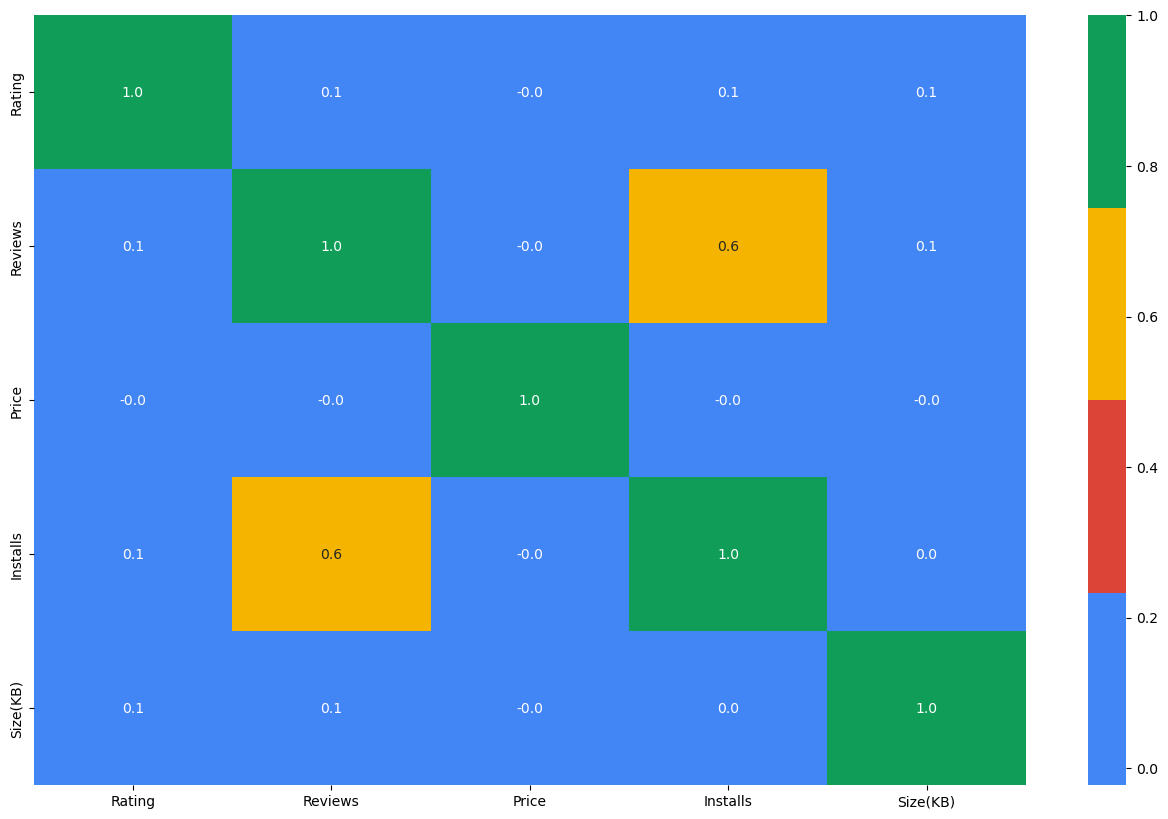

In [41]:
plt.figure(figsize=(16, 10))
numeric_cols = ['Rating', 'Reviews', 'Price', 'Installs', 'Size(KB)']

# Specifying color codes and assigning them to the variable custom palette
custom_palette = sns.color_palette(['#4285F4', '#DB4437', '#F4B400', '#0F9D58'])
sns.heatmap(data2[numeric_cols].corr(), annot=True, fmt=".1f", cmap=custom_palette)
plt.show()


The correlation matrix provides valuable insights into the relationships between different numerical variables in the dataset. One notable observation is the positive correlation between the number of reviews and the number of installs, with a correlation coefficient of approximately 0.63. 

This suggests that apps with a higher number of reviews tend to have more installs, indicating a positive relationship between user engagement and app popularity. Additionally, we observe a positive correlation between app size and the number of reviews, with a correlation coefficient of around 0.10. This implies that larger apps may attract more user feedback, possibly due to their increased functionality or complexity. 

However, the correlation between app size and installs appears to be weaker, indicating that app size alone may not be a significant factor in determining app popularity. Finally, the correlation between app price and other variables, including reviews and installs, is negligible, suggesting that app pricing is largely independent of these factors. Overall, these insights provide valuable guidance for app developers in understanding user behavior and optimizing their app strategies to enhance user engagement and satisfaction.

### Feature Engineering

Checking if our target variable which is Installs, is normally distributed using the Shapiro-Wilk Test

In [42]:
shapiro_test_stat, shapiro_p_value = stats.shapiro(data2['Installs'])
print("Shapiro-Wilk Test Statistic:", shapiro_test_stat)
print("Shapiro-Wilk Test p-value:", shapiro_p_value)

# Kurtosis and skewness
kurtosis_val = data2['Installs'].kurtosis()
skewness_val = data2['Installs'].skew()
print("Kurtosis:", kurtosis_val)
print("Skewness:", skewness_val)

Shapiro-Wilk Test Statistic: 0.16971080904485414
Shapiro-Wilk Test p-value: 4.381875001399748e-107
Kurtosis: 96.47832858464457
Skewness: 9.375744518924014


Since the p-value is less than the significance level (typically 0.05), we reject the null hypothesis of normality. This means that there is sufficient evidence to conclude that the data is not normally distributed.

Additionally, the high values of kurtosis (112.85) and skewness (10.13) indicate that the distribution is highly skewed and has heavy tails compared to a normal distribution. These values further support the conclusion that the data is not normally distributed.

#### 1. Binning the Installs Column

Since the column is not normally distributed, we used quantiles to segment the data into low,medium,high and very high bins.

In [43]:
# Define the quantiles
quantiles = [0, 0.25, 0.5, 0.75, 1]

# Compute the quantiles of the 'InstallsTest' column
install_quantiles = data2['Installs'].quantile(quantiles)

# Define the labels for the quantiles
labels = ['Low', 'Medium', 'High', 'Very High']

# Add a new column indicating the quantile category
data2['InstallCategory'] = pd.cut(data2['Installs'], bins=install_quantiles, labels=labels, include_lowest=True)

# Print the value counts for each category
print(data2['InstallCategory'].value_counts())

Low          2752
High         2169
Medium       2088
Very High    1883
Name: InstallCategory, dtype: int64


In [44]:
data2

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallCategory
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Low
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Medium
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Very High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2662.4,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,Low
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Low
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Low
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,12288.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Low


### 2.Convert Last Updated to number of months since last update

Our goal is to check if the installs are affected by the time since the app was last updated

In [45]:
# Reviewing the dataset
data2

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallCategory
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Low
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Medium
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Very High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2662.4,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,Low
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Low
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Low
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,12288.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Low


In [46]:
data2.dtypes

App                  object
Category             object
Rating              float64
Reviews               int64
Size(KB)            float64
Installs              int64
Type                 object
Price               float64
Content Rating       object
Genres               object
Last Updated         object
Current Ver          object
Android Ver          object
InstallCategory    category
dtype: object

#### Checking the minimum and maximum dates for the last update column

In [47]:
data2['Last Updated'] = pd.to_datetime(data2['Last Updated'])

print(data2['Last Updated'].min(),data2['Last Updated'].max())

2010-05-21 00:00:00 2018-08-08 00:00:00


The earliest year an app was updated was 2010 and the latest is 2018

In [48]:
data2['Year Last Updated'] = data2['Last Updated'].dt.year

Since we've extracted the years, we'll label encode them in the label encoding step

### Current Version  column

#### Splitting values in Current Version to see effects on Installs column

In [49]:
data2.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size(KB)', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'InstallCategory', 'Year Last Updated'],
      dtype='object')

Checking how many rows in current version indicate Varies with device

In [50]:
data2[data2['Current Ver'] == 'Varies with device'].shape

(1258, 15)

In [51]:
data2['Current Ver'].unique()[:50]

array(['1.0.0', '2.0.0', '1.2.4', 'Varies with device', '1.1', '1.0',
       '6.1.61.1', '2.9.2', '2.8', '1.0.4', '1.0.15', '3.8', '1.2.3', nan,
       '3.1', '2.2.5', '5.5.4', '4.0', '2.2.6.2', '1.1.3', '1.5', '1.0.8',
       '1.03', '6.0', '6.7.12.2018', '1.2', '2.20', '1.1.0', '1.6', '2.1',
       '1.0.9', '1.3', '1', '2.0.1', '1.46', '1.6.1', '11.0', '3.0',
       '1.7.1', '2.5.1', '1.0.1', '2.493', '1.9.1', '1.7',
       '2.20 Build 02', '1.37', '0.2.1', '4.47.3', '1.9.7', '2.2.21'],
      dtype=object)

In [52]:
version_list = []
for value in data2['Current Ver'].astype(str):
    if value == 'Varies with device':
        version_list.append('Varies with device')
    else:
        version_list.append(value.split('.')[0])

data2['Version'] = version_list

The code above is a for loop to extract the rows that don't have current version == varies with device

In [53]:
data2.sample(20)

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallCategory,Year Last Updated,Version
3539,Sticky Note + : Sync Notes,PRODUCTIVITY,4.2,21507,6758.4,1000000,Free,0.0,Everyone,Productivity,2017-08-31,13.4,4.0 and up,High,2017,13
9238,Barry EC,TOOLS,4.1,14,3891.2,1000,Free,0.0,Everyone,Tools,2017-12-18,1.278.0037,2.3.3 and up,Low,2017,1
7764,Deck Advisor for CR,TOOLS,4.1,37975,23552.0,5000000,Free,0.0,Everyone,Tools,2017-02-02,1.4.0,4.1 and up,High,2017,1
2206,ROBLOX,FAMILY,4.5,4450890,68608.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,Very High,2018,2
7742,ClanManagerTT2,FAMILY,4.7,55,3379.2,1000,Free,0.0,Everyone,Casual,2018-07-24,2.2.9,4.4 and up,Low,2018,2
4418,N-Back,FAMILY,4.1,413,930.0,10000,Free,0.0,Everyone,Puzzle,2016-02-15,1.6,2.1 and up,Low,2016,1
9487,3D Metal Piano Keys Keyboard Theme,FOOD_AND_DRINK,4.4,467,7475.2,100000,Free,0.0,Everyone,Food & Drink,2018-07-01,6.7.1,4.0.3 and up,Medium,2018,6
5759,Square Analog Clock AW-7,TOOLS,4.2,294,3072.0,50000,Free,0.0,Everyone,Tools,2018-03-10,2.0,4.3 and up,Medium,2018,2
2603,Snapchat,SOCIAL,4.0,17014705,12288.0,500000000,Free,0.0,Teen,Social,2018-07-30,Varies with device,Varies with device,Very High,2018,Varies with device
5179,Ai illustrator viewer,ART_AND_DESIGN,3.4,486,6041.6,100000,Free,0.0,Everyone,Art & Design,2018-07-26,5.7,5.0 and up,Medium,2018,5


In [54]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                8892 non-null   object        
 1   Category           8892 non-null   object        
 2   Rating             8892 non-null   float64       
 3   Reviews            8892 non-null   int64         
 4   Size(KB)           8892 non-null   float64       
 5   Installs           8892 non-null   int64         
 6   Type               8892 non-null   object        
 7   Price              8892 non-null   float64       
 8   Content Rating     8892 non-null   object        
 9   Genres             8892 non-null   object        
 10  Last Updated       8892 non-null   datetime64[ns]
 11  Current Ver        8888 non-null   object        
 12  Android Ver        8890 non-null   object        
 13  InstallCategory    8892 non-null   category      
 14  Year La

In [55]:
data2['Version'].value_counts()

1                       3430
2                       1334
Varies with device      1258
3                        764
4                        549
                        ... 
a                          1
5055                       1
version 0                  1
27500000                   1
3rd Release Aug 2016       1
Name: Version, Length: 184, dtype: int64

In [56]:
# Function to create version bins

def bin_version(version):
    if version in ['1', '2', '3', '4', '5']:
        return version
    elif version == 'Varies with device' or version == '':
        return '0'
    else:
        return '6'

# Applying the bin_version function to the 'Version' column
data2['Version_binned'] = data2['Version'].apply(bin_version).astype(int)

# Uisng the to apply the function
data2.sample(20)

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallCategory,Year Last Updated,Version,Version_binned
7155,DIY Crafts Cds,LIFESTYLE,4.0,209,3174.4,50000,Free,0.00,Everyone,Lifestyle,2017-01-24,3.0,3.0 and up,Medium,2017,3,3
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,13312.0,1000000000,Free,0.00,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up,Very High,2018,5,5
2994,GollerCepte 1903,SPORTS,4.7,25172,30720.0,500000,Free,0.00,Everyone,Sports,2018-05-23,5.5,4.1 and up,Medium,2018,5,5
4929,AC Remote Control Simulator,FAMILY,3.3,353,2355.2,100000,Free,0.00,Everyone,Entertainment,2017-12-04,1.0,4.0.3 and up,Medium,2017,1,1
5330,Quran for All (Al-Huda Int.),FAMILY,4.8,6696,5427.2,100000,Free,0.00,Everyone,Education,2018-02-07,3.1.0,4.0 and up,Medium,2018,3,3
10511,Motocross Mayhem,GAME,3.8,35171,46080.0,1000000,Free,0.00,Everyone,Racing,2014-02-11,1.2,2.3 and up,High,2014,1,1
7216,Merck CE,BUSINESS,4.5,2,25600.0,100,Free,0.00,Everyone,Business,2017-02-13,1.0,4.1 and up,Low,2017,1,1
7098,CA Laws 2018 (California Laws and Codes),BOOKS_AND_REFERENCE,3.9,56,38912.0,5000,Free,0.00,Everyone,Books & Reference,2018-03-24,1.17,4.4 and up,Low,2018,1,1
2980,BBC Sport,SPORTS,4.2,18678,12288.0,1000000,Free,0.00,Everyone,Sports,2018-04-25,Varies with device,Varies with device,High,2018,Varies with device,0
1320,Sworkit: Workouts & Fitness Plans,HEALTH_AND_FITNESS,4.6,109756,79872.0,5000000,Free,0.00,Everyone,Health & Fitness,2018-08-01,8.2.0,4.0.3 and up,High,2018,8,6


We've used Current version and version to feature engineer Version binned so that's why we're dropping them.
We extracted the major version update number from the Current Version column, created a function to bin them into groups and carried out label encoding on the created categories.

### Binning Android Version Column

In [57]:
data2['Android Ver'].value_counts()

4.1 and up            1987
4.0.3 and up          1197
Varies with device    1178
4.0 and up            1094
4.4 and up             789
2.3 and up             573
5.0 and up             481
4.2 and up             331
2.3.3 and up           238
3.0 and up             207
2.2 and up             203
4.3 and up             199
2.1 and up             112
1.6 and up              87
6.0 and up              46
7.0 and up              41
3.2 and up              31
2.0 and up              27
1.5 and up              16
5.1 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              5
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

Extracting the major Android Version

In [58]:
version_list = []
for value in data2['Android Ver'].astype(str):
    if value == 'Varies with device':
        version_list.append('Varies with device')
    else:
        version_list.append(value.split('.')[0])

data2['Major Android Version'] = version_list

In [59]:
data2.sample(20)

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallCategory,Year Last Updated,Version,Version_binned,Major Android Version
10178,Premier League - Official App,SPORTS,4.3,63782,24576.0,5000000,Free,0.00,Everyone,Sports,2018-08-07,1.1.5,4.1 and up,High,2018,1,1,4
1359,OvuView: Ovulation and Fertility,HEALTH_AND_FITNESS,4.5,40296,12288.0,1000000,Free,0.00,Everyone,Health & Fitness,2018-06-15,Varies with device,Varies with device,High,2018,Varies with device,0,Varies with device
7693,IV Go（get IV for Pokemon）,GAME,4.6,132282,20480.0,1000000,Free,0.00,Everyone,Adventure,2018-07-31,15.0,4.1 and up,High,2018,15,6,4
1672,Block Puzzle Classic Legend !,GAME,4.2,17039,5017.6,5000000,Free,0.00,Everyone,Puzzle,2018-04-13,2.9,2.3.3 and up,High,2018,2,2,2
2996,Speed Boat Racing,SPORTS,4.0,2487,27648.0,1000000,Free,0.00,Everyone,Sports,2018-08-03,12.0,4.0.3 and up,High,2018,12,6,4
8937,DV-LOTTERY 2019 REGISTRATION,FAMILY,4.5,97,2662.4,10000,Free,0.00,Everyone,Entertainment,2018-01-20,3.0,4.0 and up,Low,2018,3,3,4
3307,MyScript Calculator,TOOLS,4.5,342336,12288.0,10000000,Free,0.00,Everyone,Tools;Education,2015-08-10,Varies with device,Varies with device,Very High,2015,Varies with device,0,Varies with device
1891,slither.io,GAME,4.4,5235294,12288.0,100000000,Free,0.00,Everyone,Action,2017-11-14,Varies with device,2.3 and up,Very High,2017,Varies with device,0,2
4007,CPlus for Craigslist - Officially Licensed,LIFESTYLE,4.5,8096,16384.0,1000000,Free,0.00,Mature 17+,Lifestyle,2018-08-03,1.6.4,4.1 and up,High,2018,1,1,4
349,Call Free – Free Call,COMMUNICATION,4.3,30209,15360.0,5000000,Free,0.00,Everyone,Communication,2018-07-28,1.3.4,4.1 and up,High,2018,1,1,4


We've called the same function we called for current version in creating the bins

In [60]:
# Applying the bin_version function to the 'Version' column
data2['Android_Version_binned'] = data2['Major Android Version'].apply(bin_version).astype(int)

# Uisng the to apply the function
data2.sample(20)

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallCategory,Year Last Updated,Version,Version_binned,Major Android Version,Android_Version_binned
6796,Battery Notifier Pro BT,TOOLS,4.7,1363,1638.4,10000,Paid,2.59,Everyone,Tools,2017-06-07,2.5.18,1.6 and up,Low,2017,2,2,1,1
3721,News24,NEWS_AND_MAGAZINES,4.1,30693,12288.0,1000000,Free,0.00,Everyone 10+,News & Magazines,2018-08-01,Varies with device,Varies with device,High,2018,Varies with device,0,Varies with device,0
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,12288.0,1000000000,Free,0.00,Everyone,Photography,2018-08-01,Varies with device,Varies with device,Very High,2018,Varies with device,0,Varies with device,0
2641,Meetup,SOCIAL,4.2,79130,23552.0,5000000,Free,0.00,Teen,Social,2018-08-02,3.10.26,4.4 and up,High,2018,3,3,4,4
6728,BS Meter (Ad Supported),FAMILY,3.9,14,592.0,1000,Free,0.00,Teen,Entertainment,2013-08-14,2.0,2.2 and up,Low,2013,2,2,2,2
5251,AJ Men's Grooming,LIFESTYLE,5.0,2,22528.0,100,Free,0.00,Everyone,Lifestyle,2017-08-28,5,4.1 and up,Low,2017,5,5,4,4
958,Netflix,ENTERTAINMENT,4.4,5456708,12288.0,100000000,Free,0.00,Teen,Entertainment,2018-07-31,Varies with device,Varies with device,Very High,2018,Varies with device,0,Varies with device,0
10148,EZ Clock & Weather Widget,WEATHER,4.2,6849,1228.8,1000000,Free,0.00,Everyone,Weather,2014-03-05,v1.9.6 beta 1,2.1 and up,High,2014,v1,6,2,2
10639,Florida Today,NEWS_AND_MAGAZINES,3.3,202,38912.0,10000,Free,0.00,Everyone 10+,News & Magazines,2018-06-20,5.9.5,5.0 and up,Low,2018,5,5,5,5
8295,Speed Camera Radar,MAPS_AND_NAVIGATION,4.1,54034,5939.2,5000000,Free,0.00,Teen,Maps & Navigation,2018-05-30,2.1.15,4.0 and up,High,2018,2,2,4,4


We decided to drop the following columns:

Since we've already extracted useful information from Last Updated, Current Ver and Android Ver and the rest(Year Last Updated,and Version) were feature engineered, we decided to drop them.

We're also dropping Genres as it contains the same information in the category column. 

In [61]:
# Dropping the columns

data2.drop(columns=['Last Updated','Current Ver','Genres','Installs','Android Ver','Version','Major Android Version'],inplace=True)

In [62]:
# Setting the app as the index

data2.set_index('App',inplace=True)

In [63]:
data2

,Category,Rating,Reviews,Size(KB),Type,Price,Content Rating,InstallCategory,Year Last Updated,Version_binned,Android_Version_binned
App,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,Free,0.0,Everyone,Low,2018,1,4
Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,Free,0.0,Everyone,Medium,2018,2,4
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8908.8,Free,0.0,Everyone,High,2018,1,4
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,Free,0.0,Teen,Very High,2018,0,4
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,Free,0.0,Everyone,Medium,2018,1,4
...,...,...,...,...,...,...,...,...,...,...,...
FR Calculator,FAMILY,4.0,7,2662.4,Free,0.0,Everyone,Low,2017,1,4
Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,Free,0.0,Everyone,Low,2017,1,4
Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,Free,0.0,Everyone,Low,2018,1,4


### Checking how distributed the classes are in the target variable

In [64]:
print('Raw counts: \n')
print(data2['InstallCategory'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(data2['InstallCategory'].value_counts(normalize=True))

Raw counts: 

Low          2752
High         2169
Medium       2088
Very High    1883
Name: InstallCategory, dtype: int64
-----------------------------------
Normalized counts: 

Low          0.309492
High         0.243927
Medium       0.234818
Very High    0.211763
Name: InstallCategory, dtype: float64


The classes are almost uniformly balanced

In [65]:
data2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

### Train Test Split

In [66]:
# Assigning the features and the target
X = data2.drop(['InstallCategory'],axis=1)
y = data2['InstallCategory']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=999,test_size=0.2)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7113, 10)
(1779, 10)
(7113,)
(1779,)


### One Hot Encoding

We're one hot encoding the Category column then label encode the Type and Content Rating column.
This is because if we one hot encoded the category column, we would end up with so many features.Since content rating and the type column have ordinal relationship and can be assigned based on the order of importance, unlike the category column, which is nominal and importance can't be attached to each output. Label encoding presented itself as the best option.

0ne hot encoding - Norminal variables(Category)

In [68]:
categorical_column = ['Category']

# One Hot Encoding X_train
X_train_encoded = pd.get_dummies(data=X_train,columns=categorical_column, drop_first=True)

# One Hot Encoding X_test
X_test_encoded = pd.get_dummies(data=X_test,columns=categorical_column, drop_first=True)

X_train_encoded.sample(20)


,Rating,Reviews,Size(KB),Type,Price,Content Rating,Year Last Updated,Version_binned,Android_Version_binned,Category_AUTO_AND_VEHICLES,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
App,,,,,,,,,,,,,,,,,,,,,
My Movies Pro - Movie & TV Collection Library,4.6,6477,20480.0,Paid,7.99,Everyone,2018,2,4,0,...,0,0,0,0,0,0,0,0,0,0
Wide address pocket prep,4.5,513,12288.0,Free,0.00,Everyone,2018,4,4,0,...,0,0,0,0,0,0,0,0,0,0
Car Parking Nissan GT-R R35 Simulator,3.2,513,34816.0,Free,0.00,Everyone,2017,1,4,0,...,0,0,0,0,0,0,0,0,0,0
Discover Mobile,4.6,87951,69632.0,Free,0.00,Everyone,2018,6,4,0,...,0,0,0,0,0,0,0,0,0,0
"Meet4U - Chat, Love, Singles!",4.2,40039,6656.0,Free,0.00,Mature 17+,2018,1,4,0,...,0,0,0,0,0,0,0,0,0,0
SMS AI Bot,3.8,89,3993.6,Free,0.00,Everyone,2018,3,4,0,...,0,0,0,0,0,0,1,0,0,0
Hitwe - meet people and chat,4.2,243950,21504.0,Free,0.00,Mature 17+,2018,4,4,0,...,0,0,0,0,0,0,0,0,0,0
Chuck E.'s Skate Universe,3.9,94910,45056.0,Free,0.00,Everyone,2017,1,4,0,...,0,0,0,0,0,0,0,0,0,0
OFF-ROAD SIMULATOR 4x4 : REAL,4.2,109,25600.0,Free,0.00,Everyone,2017,1,2,0,...,0,0,0,0,0,0,0,0,0,0


### Label Encoding the Type Column

In [69]:
le = LabelEncoder()
X_train_encoded['Type'] = le.fit_transform(X_train_encoded['Type'])
X_test_encoded['Type'] = le.transform(X_test_encoded['Type'])

In [70]:
X_test_encoded

,Rating,Reviews,Size(KB),Type,Price,Content Rating,Year Last Updated,Version_binned,Android_Version_binned,Category_AUTO_AND_VEHICLES,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
App,,,,,,,,,,,,,,,,,,,,,
"FastMeet: Chat, Dating, Love",4.2,22545,6041.6,0,0.0,Mature 17+,2018,1,4,0,...,0,0,0,0,0,0,0,0,0,0
PumpUp — Fitness Community,4.0,49479,58368.0,0,0.0,Teen,2018,5,5,0,...,0,0,0,0,0,0,0,0,0,0
Metal Soldiers 2,4.4,153381,12288.0,0,0.0,Teen,2018,1,4,0,...,0,0,0,0,0,0,0,0,0,0
Photo Editor Selfie Camera Filter & Mirror Image,4.3,527248,12288.0,0,0.0,Everyone,2018,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Princess Coloring Book,4.5,9770,39936.0,0,0.0,Everyone,2018,1,4,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fire Emblem Heroes,4.6,407694,12288.0,0,0.0,Teen,2018,2,4,0,...,0,0,0,0,0,0,0,0,0,0
Be the Manager 2016 (football),4.2,4330,6246.4,0,0.0,Everyone,2017,3,4,0,...,0,0,0,0,0,1,0,0,0,0
DEER HUNTER CHALLENGE,3.7,38767,4198.4,0,0.0,Everyone 10+,2011,1,2,0,...,0,0,0,0,0,0,0,0,0,0


### Label Encoding Content Rating Column

In [71]:
# X_train
X_train_encoded['Content Rating'] = le.fit_transform(X_train_encoded['Content Rating'])

# X_test
X_test_encoded['Content Rating'] = le.transform(X_test_encoded['Content Rating'])

In [72]:
X_train_encoded.sample(20)

,Rating,Reviews,Size(KB),Type,Price,Content Rating,Year Last Updated,Version_binned,Android_Version_binned,Category_AUTO_AND_VEHICLES,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
App,,,,,,,,,,,,,,,,,,,,,
Case Simulator Hero for CS:GO,4.3,14604,69632.0,0,0.00,4,2018,3,4,0,...,0,0,0,0,0,0,0,0,0,0
BN Pro LcdD-b HD Text,3.9,131,429.0,0,0.00,1,2017,2,1,0,...,0,0,0,0,0,0,0,0,0,0
"CM Launcher 3D - Theme, Wallpapers, Efficient",4.6,6700847,17408.0,0,0.00,4,2018,5,4,0,...,1,0,0,0,0,0,0,0,0,0
I am Rich Premium Plus,4.6,459,2048.0,1,18.99,1,2018,1,4,0,...,0,0,0,0,0,0,0,0,0,0
"FXNOW: Movies, Shows & Live TV",3.9,31552,12288.0,0,0.00,4,2018,0,4,0,...,0,0,0,0,0,0,0,0,0,0
CP Dialer,4.3,64,3379.2,0,0.00,4,2018,2,4,0,...,0,0,0,0,1,0,0,0,0,0
Smart Launcher 5,4.4,512106,12288.0,0,0.00,1,2018,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Flo's CH Boss Timer,3.5,163,3481.6,0,0.00,1,2017,1,4,0,...,0,0,0,0,0,0,0,0,0,0
DINO HUNTER: DEADLY SHORES,4.4,1381820,55296.0,0,0.00,4,2017,3,3,0,...,0,0,0,0,0,0,0,0,0,0


### Label Encoding Year Last Updated

In [73]:
# X_train
X_train_encoded['Year Last Updated'] = le.fit_transform(X_train_encoded['Year Last Updated'])

# X_test
X_test_encoded['Year Last Updated'] = le.transform(X_test_encoded['Year Last Updated'])

In [74]:
X_train_encoded

,Rating,Reviews,Size(KB),Type,Price,Content Rating,Year Last Updated,Version_binned,Android_Version_binned,Category_AUTO_AND_VEHICLES,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
App,,,,,,,,,,,,,,,,,,,,,
Sin City Hero : Crime Simulator of Vegas,4.1,3371,79872.0,0,0.0,4,7,1,4,0,...,0,0,0,0,0,0,0,0,0,0
AW Reader: news & apps [Dutch],4.1,1948,12288.0,0,0.0,1,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JustDating,4.0,13440,50176.0,0,0.0,3,8,3,4,0,...,0,0,0,0,0,0,0,0,0,0
LEGO® TV,3.7,17247,7372.8,0,0.0,2,8,4,5,0,...,0,0,0,0,0,0,0,0,0,0
L.O.L. Surprise Ball Pop,4.3,10088,12288.0,0,0.0,1,8,0,4,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CNY Slots : Gong Xi Fa Cai 发财机,3.6,33,72704.0,0,0.0,4,7,1,4,0,...,0,0,0,0,0,0,0,0,0,0
love sms good morning,4.2,10,3174.4,0,0.0,1,6,1,2,0,...,0,0,0,0,0,0,0,0,0,0
ESPN Fantasy Sports,4.0,176487,10240.0,0,0.0,1,7,5,4,0,...,0,0,0,0,0,1,0,0,0,0


## Modelling

The target variable for this project is the installs variable which indicates the number of installations an app gets.

A classification model is the most appropriate for this project where we will be classifying an app's success (into either low, medium, high and very high) based on the number of installations. We choose accuracy as our model of success because how close our predictions are compared to the actual values is integral to our decision making

We will be implementing a simple logistic regression as our baseline model as shown below. 

In [75]:
# Function for feature importance

def model_feature_importance(classifier_name,trained_df,model_name):
    feature_importance = classifier_name.feature_importances_[:10]
    feature_names = list(trained_df.columns)

    # Sorting according to feature importance using numpy
    indices = np.argsort(feature_importance)

    # Plotting
    plt.figure(figsize=(10,8))
    plt.barh(range(len(indices)),feature_importance[indices],color='#356AC3')
    plt.title(f"Feature Importance according to {model_name}")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')

    return plt.show()

In [76]:
# Creating a function to plot the confusion matrices for all the models to avoid repetition

def plot_confusion_matrix(y_test_values,y_prediction_values,cmap_value):
    labels = sorted(set(y_test_values).union(set(y_prediction_values)))

    # Plotting the confusion matrix
    cm = confusion_matrix(y_test_values,y_prediction_values)

    # Visualizing the confusion matrix
    display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    return display.plot(cmap=plt.cm.get_cmap(cmap_value))

#### i) Logistic Regression - The Baseline Model

In [78]:
# Instantiating the Logistic Regression model and setting the random seed
logreg = LogisticRegression(random_state=42)

# Fit the model on the training set
logreg.fit(X_train_encoded,y_train)

# Predicting
y_pred = logreg.predict(X_test_encoded)

# Model performance evaluation
print("Logistic Regression Precision Score: ", precision_score(y_test,y_pred, average='weighted'))
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression Precision Score:  0.7927070699626826
Classification Report:
              precision    recall  f1-score   support

        High       0.74      0.72      0.73       445
         Low       0.82      0.96      0.89       529
      Medium       0.71      0.66      0.68       428
   Very High       0.91      0.78      0.84       377

    accuracy                           0.79      1779
   macro avg       0.80      0.78      0.79      1779
weighted avg       0.79      0.79      0.79      1779



Our baseline logistic regression model performed quite well with a precision of 79% on the unseen data. The model's computation time was efficient despite the large dataset and forms a good foundation for comparison against other models.

The relatively high performance of the baseline model indicates that the chosen model approach(classification) is best suited for our data problem.

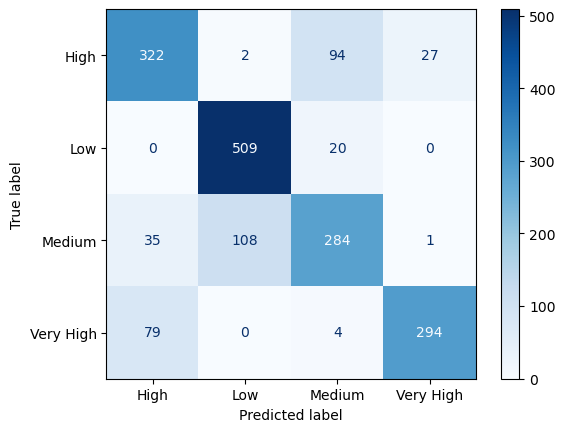

In [79]:
plot_confusion_matrix(y_test,y_pred,'Blues')

### Function for modelling

To automate the model building process, we created a function train_and_evaluate_model() that takes in the model to be implemented, fits the model onto the dataset, predicts, evaluates, and displays the model performance results.

The additional models we decided would best fit our problem include:

    1. K-Nearest Neighbors (KNN)
      
    2. Support Vector Classifier (SVC)
    
    3. Decision Trees
    
    4. Extreme Gradient Boosting (XGBoost)
    
    5. Random Forests

In [84]:
def train_and_evaluate_model(model_name,return_model=False):

    if model_name == "KNN":
        model = KNeighborsClassifier(n_neighbors=5)
    elif model_name == "Decision Tree":
        model = DecisionTreeClassifier(random_state=42)
    elif model_name == "SVM":
        model = SVC(kernel="linear", C=1)
    elif model_name == 'XGBoost':
        model = XGBClassifier()
    elif model_name == "AdaBoost":
        model = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
    elif model_name == "Random Forest":
        model = RandomForestClassifier(random_state=42)
    else:
        raise ValueError(f"Invalid model name: {model_name}")

    # Cross-validation with accuracy scoring
    cv_scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring="accuracy")
    print(f"{model_name} Cross-Validation Scores: {cv_scores}")

    if return_model:
        return model

    # Fit the model with training data
    model.fit(X_train_encoded, y_train)

    # Make predictions
    predictions = model.predict(X_test_encoded)
    precision = precision_score(y_test, predictions, average='weighted')

    # Condition for feature importance
    if model_name in ['Decision Tree','Random Forest','Adaboost','XGBoost']:
        model_feature_importance(model,X_train_encoded,model_name)

    # Confusion Matrix
    plot_confusion_matrix(y_test,predictions,'Blues')
    
    # Classification report
    report = classification_report(y_test, predictions)

    print("Precision Score: ",precision)

    print('\n')

    print("Classification Report: \n",report)


#### ii) KNN

KNN Cross-Validation Scores: [0.80112439 0.79128602 0.80534083 0.77285513 0.79606188]
Precision Score:  0.8146498322350307


Classification Report: 
               precision    recall  f1-score   support

        High       0.74      0.78      0.76       445
         Low       0.88      0.92      0.90       529
      Medium       0.77      0.71      0.74       428
   Very High       0.86      0.83      0.85       377

    accuracy                           0.82      1779
   macro avg       0.81      0.81      0.81      1779
weighted avg       0.81      0.82      0.81      1779



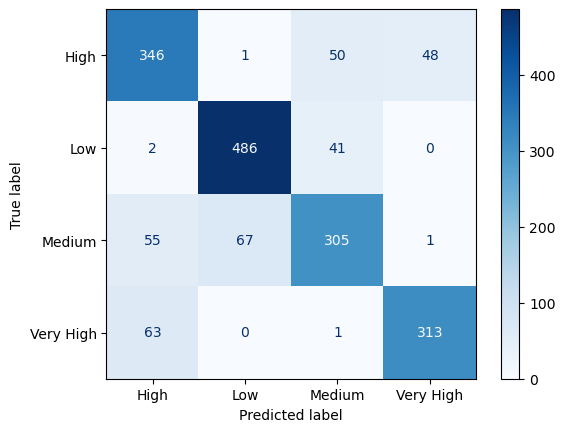

In [85]:
train_and_evaluate_model('KNN')

From the above results, the KNN algorithm performed a bit beter than the baseline model, achieving an precision score of 81%. KNN is considered a lazy learner because it attempts to memorize the entire training dataset instead of understanding the underlying relationship between the complex data variables of our dataset, but still performed a bit better than our baseline model.

#### iii) SVM

In [86]:
#train_and_evaluate_model('SVM')

SVM aims to find the decision boundary that maximizes the margin between classes. This margin maximization property helps SVM generalize well to unseen data, leading to good performance on test data.

The moderately better SVM accuracy (72%) is a testament to this model's performance to relatively high dimensional space like the one seen in our dataset. This is so as it finds a hyperplane that separates classes in high-dimensional space, even when the number of features exceeds the number of samples.

Furthermore, SVM performed slightly better due to its ability to capture complex relationships in the data by finding the optimal hyperplane that maximizes the margin between classes. This is advantageous to our data where our data is not linearly separable.

#### iv) Decision Tree

Decision Tree Cross-Validation Scores: [0.81377372 0.81096275 0.8151792  0.80801688 0.80661041]


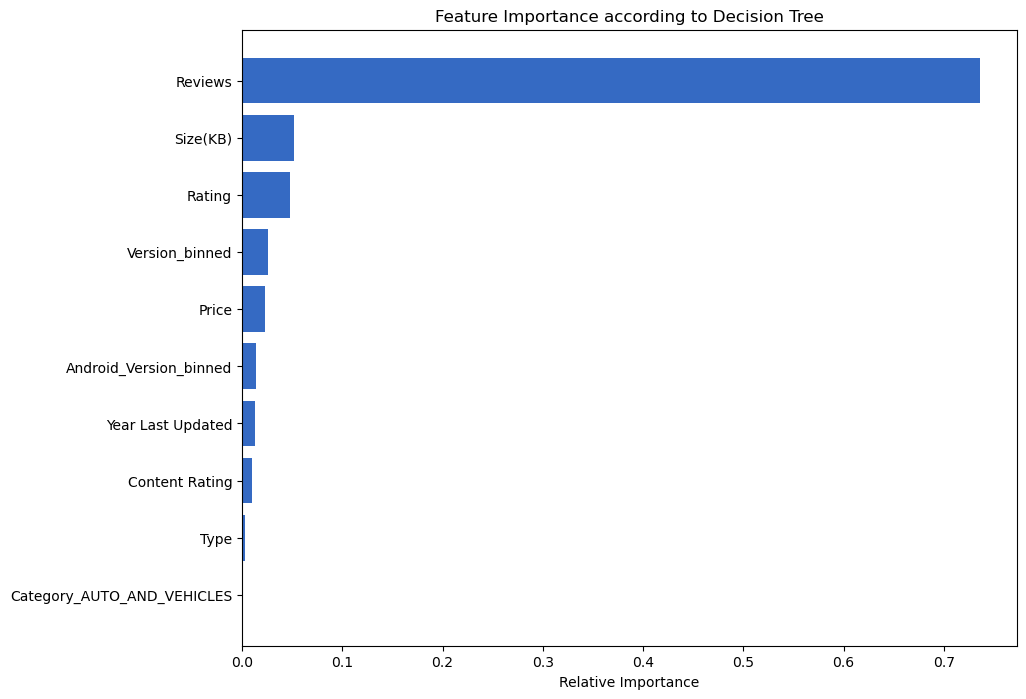

Precision Score:  0.8099730352339468


Classification Report: 
               precision    recall  f1-score   support

        High       0.75      0.72      0.74       445
         Low       0.90      0.91      0.91       529
      Medium       0.76      0.74      0.75       428
   Very High       0.82      0.85      0.83       377

    accuracy                           0.81      1779
   macro avg       0.81      0.81      0.81      1779
weighted avg       0.81      0.81      0.81      1779



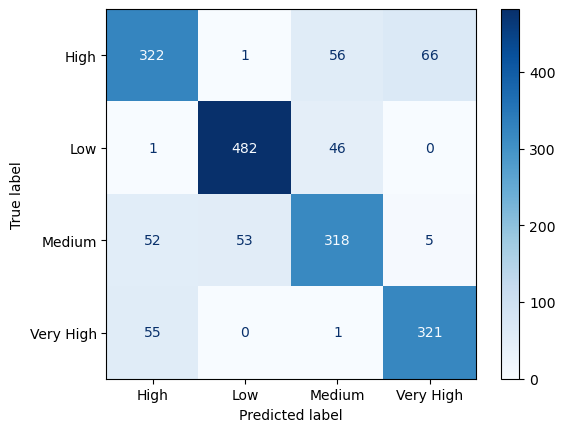

In [87]:
train_and_evaluate_model('Decision Tree')

The high precision score of 81% by the Decision Trees can be attributed to the model's ability to capture complex nonlinear relationships. Decision Trees are inherently non-linear models. They capture piece-wise relationships between features, making them suitable for complex problems.

They recursively split the feature space into regions based on simple decision rules, allowing them to model complex decision boundaries effectively. Additionally, Decision Trees are robust to outliers in the data. Predictions are aggregated from subsamples, reducing the impact of outliers. 

#### v) XGBoost

Modelling XGBoost separately cause it requires label encoding of the y column

In [88]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, y_encoded contains the numerical labels
y_train_encoded.shape


(7113,)

In [89]:
# Instantiating the class
xg_boost = XGBClassifier()

# Fitting the model
xg_boost.fit(X_train_encoded,y_train_encoded)

# Predicting
xgboost_prediction = xg_boost.predict(X_test_encoded)

In [90]:
print("Precision: ",precision_score(y_test_encoded,xgboost_prediction, average='weighted'))

Precision:  0.8603631825339128


XGBoost is based on the gradient boosting technique, which builds a series of decision trees sequentially, with each tree correcting the errors of the previous one. This iterative approach enables XGBoost to gradually improve its predictive performance.

XGBoost, being an ensemble learning technique, combines weak learners (decision trees) to create a strong learner. The high precision score of 86% can be attributed to the model's robustness to overfitting and its ability to handle complex interactions and outliers effectively.

#### vi) Random Forest

Random Forest Cross-Validation Scores: [0.84047786 0.86156008 0.85874912 0.85091421 0.85583685]


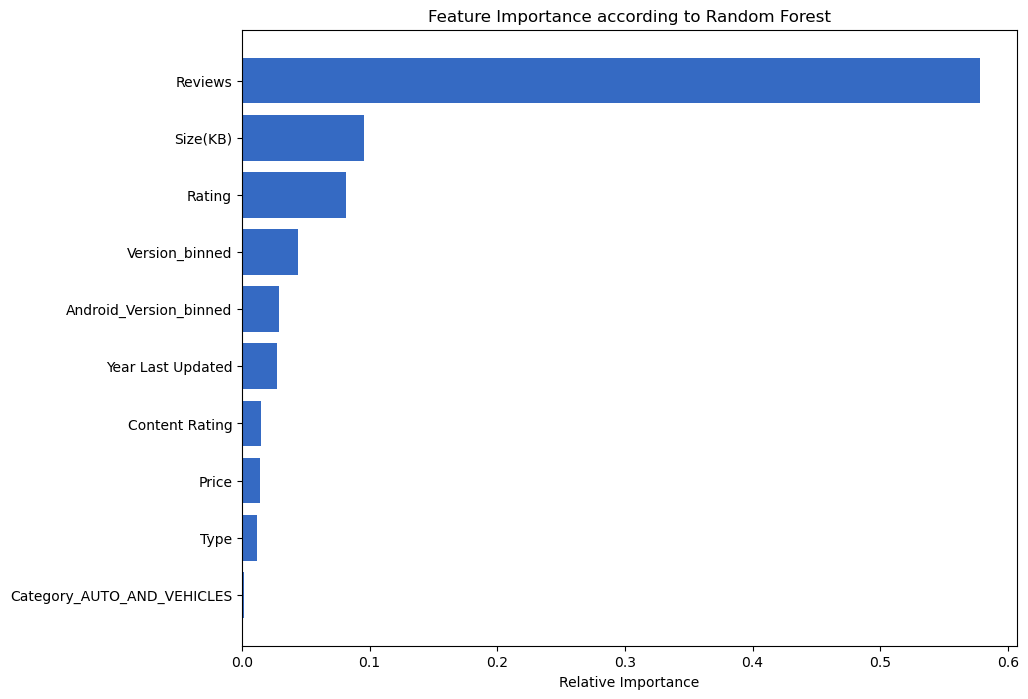

Precision Score:  0.8711456079446868


Classification Report: 
               precision    recall  f1-score   support

        High       0.82      0.84      0.83       445
         Low       0.93      0.93      0.93       529
      Medium       0.83      0.83      0.83       428
   Very High       0.90      0.88      0.89       377

    accuracy                           0.87      1779
   macro avg       0.87      0.87      0.87      1779
weighted avg       0.87      0.87      0.87      1779



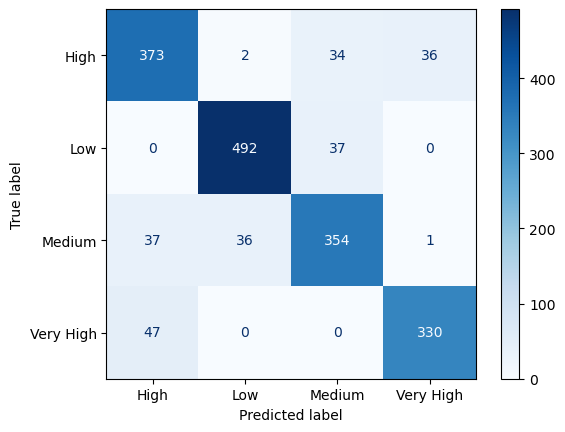

In [91]:
train_and_evaluate_model('Random Forest')

Random forests is the best-performing model in our dataset. It is an ensemble learning technique that constructs multiple decision trees and averages their predictions. Each tree is trained on a random subset of the data and a random subset of features, which helps to reduce overfitting.


The high accuracy score can be attributed to their robustness to overfitting and outliers, ability to handle high-dimensional data, ability to reduce variance, and ability to improve generalization. 

### HyperParameter Tuning

Random Search is computationally cheaper than Grid Search, as it does not require evaluating all possible combinations.
We opted for Random Search over Grid Search because of computational resources and time. The models took long to run when using Grid Search and lesser time after implementation of Random Search.


The accuracy of the models also dropped when using Grid Search.The opposite is true for Random Search.Hence Random Search proved to be more efficient compared to Grid Search.

#### a) Tuning XGBoost Model.

Learning rate - Controls the step size during the learning process.Lower models make the model more robust by taking smaller steps

Max depth- Controls the max depth of tree

n_estimators - Number of boosting rounds

Regularization paramter - To prevent overfitting

Sub samples - Controls the fraction of samples to be used in boosting hence controls overfitting.Percentage of rows used for each tree construction. Lowering this value can prevent overfitting by training on a smaller subset of the data.

Minimum child weight

In [92]:

param_grid = {
     'learning_rate': uniform(0.001, 0.1),
     'max_depth': randint(3, 8),
     'n_estimators': randint(50, 250),  # Using randint for integer values
     'subsample': uniform(0.5, 0.7)  # Assuming you want to sample floats between 0.5 and 1
}

# Create RandomizedSearchCV instance
random_search = RandomizedSearchCV(estimator=XGBClassifier(random_state=42), param_distributions=param_grid, n_iter=50, cv=3, random_state=123)

# Fitting the model
random_search.fit(X_train_encoded, y_train_encoded)

# Printing the best parameters
best_params = random_search.best_params_
best_params

{'learning_rate': 0.05194292614503132,
 'max_depth': 7,
 'n_estimators': 116,
 'subsample': 0.6790900512596245}

In [93]:
# Tuned XGBoost Classifier with the best parameters given above
tuned_xgboost = XGBClassifier(
                    n_estimators = 116,
                    max_depth = 7,
                    subsample = 0.6790900512596245,
                    learning_rate = 0.05194292614503132,
                    )

# Fitting the tuned model on the training data
tuned_xgboost.fit(X_train_encoded,y_train_encoded)

# Making predictions on the test set
tuned_xgboost_prediction = tuned_xgboost.predict(X_test_encoded)

print("Precision: ",precision_score(y_test_encoded,tuned_xgboost_prediction, average='weighted'))

Precision:  0.8743692333844088


#### b) Tuning Decision Trees.

In [94]:
parameter_grid = {
    'max_depth': [2,3,5,10,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [5,10,15],
    'criterion': ['gini','entropy'],
}

# Using Grid Search Cv to find the best parameters
grid_search = GridSearchCV(train_and_evaluate_model('Decision Tree',return_model=True),param_grid=parameter_grid,cv=5)

# Fitting the grid search object to the trained data
grid_search.fit(X_train_encoded,y_train)

# Printing the best parameters
best_decision_params = grid_search.best_params_
best_decision_params

Decision Tree Cross-Validation Scores: [0.81377372 0.81096275 0.8151792  0.80801688 0.80661041]


{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 15,
 'min_samples_split': 2}

#### c) Tuning Random Forest

In [95]:
# Define the parameter distributions
param_dist = {
    'n_estimators': [25, 50, 100, 200,300,400],
    'max_depth': [5, 10, 15, None],  # None for no maximum depth
    'min_samples_split': randint(2, 15),  # Random integer between 2 and 10
    'min_samples_leaf': randint(1, 16),  # Random integer between 1 and 15
    'criterion': ['entropy', 'gini'],
    'bootstrap': [True,False]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
random_search.fit(X_train_encoded, y_train)

# Get the best parameters
best_params = random_search.best_params_
best_params


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

##### Function after using Randomized search for tuning

In [100]:
def train_and_evaluate_model(model_name,return_model=False):
    if model_name == "Decision Tree":
        model = DecisionTreeClassifier(
            random_state=42,
            criterion='gini',
            max_depth=10,
            min_samples_leaf=15,
            min_samples_split=2
            )
    elif model_name == "SVM":
        model = SVC(kernel="linear", C=1)
    elif model_name == "AdaBoost":
        model = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
    elif model_name == "Random Forest":
        model = RandomForestClassifier(
            random_state=42,
            criterion='gini',
            min_samples_leaf=1,
            min_samples_split=9,
            n_estimators=300
            )
        

    # Cross-validation with accuracy scoring
    cv_scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring="accuracy")
    print(f"{model_name} Cross-Validation Scores: {cv_scores}")

    if return_model:
        return model

    # Fit the model with training data
    model.fit(X_train_encoded, y_train)

    # Make predictions
    predictions = model.predict(X_test_encoded)
    precision = precision_score(y_test, predictions, average='weighted')

    # Condition for feature importance
    if model_name in ['Decision Tree','Random Forest','Adaboost','XGBoost']:
        model_feature_importance(model,X_train_encoded,model_name)

    # Confusion Matrix
    plot_confusion_matrix(y_test,predictions,'Blues')
    
    # Classification report
    report = classification_report(y_test, predictions)

    print("Precision Score: ",precision)

    print('\n')

    print("Classification Report: \n",report)


##### Decision Tree.

Decision Tree Cross-Validation Scores: [0.83274772 0.82501757 0.85593816 0.8347398  0.83825598]


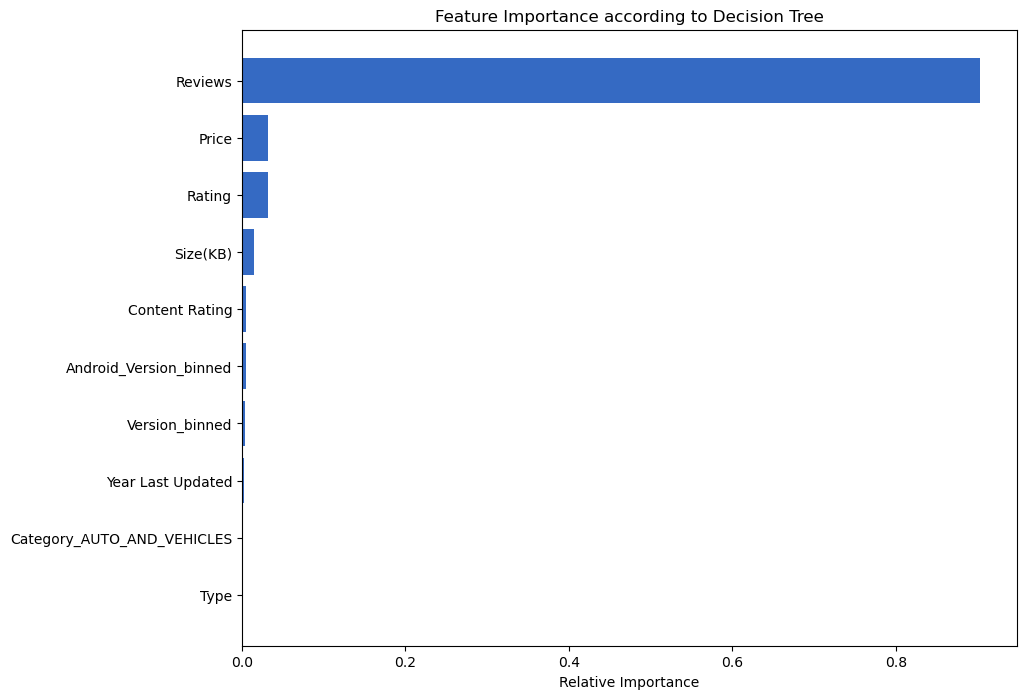

Precision Score:  0.8580903049061992


Classification Report: 
               precision    recall  f1-score   support

        High       0.82      0.80      0.81       445
         Low       0.92      0.93      0.92       529
      Medium       0.83      0.83      0.83       428
   Very High       0.85      0.86      0.86       377

    accuracy                           0.86      1779
   macro avg       0.85      0.85      0.85      1779
weighted avg       0.86      0.86      0.86      1779



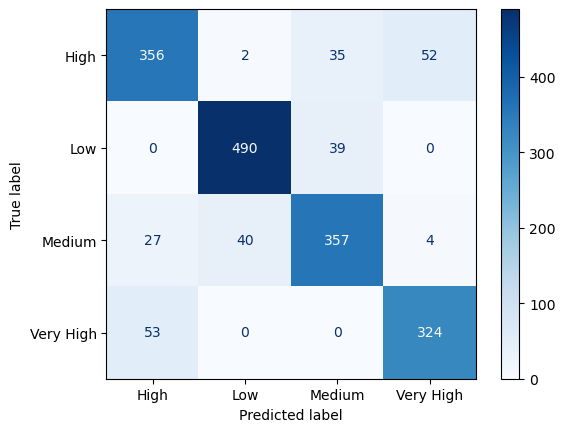

In [101]:
train_and_evaluate_model('Decision Tree',return_model=False)

##### Random Forest

Random Forest Cross-Validation Scores: [0.84609979 0.8566409  0.86296557 0.84810127 0.85654008]


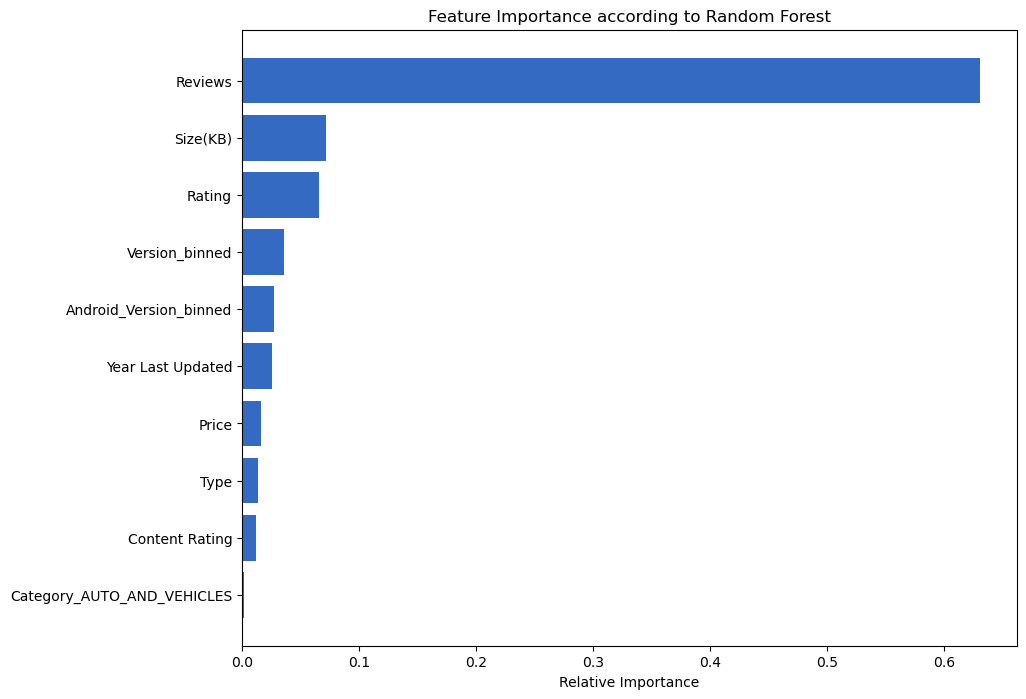

Precision Score:  0.8752140212076632


Classification Report: 
               precision    recall  f1-score   support

        High       0.82      0.85      0.83       445
         Low       0.93      0.93      0.93       529
      Medium       0.83      0.83      0.83       428
   Very High       0.92      0.88      0.90       377

    accuracy                           0.87      1779
   macro avg       0.87      0.87      0.87      1779
weighted avg       0.88      0.87      0.87      1779



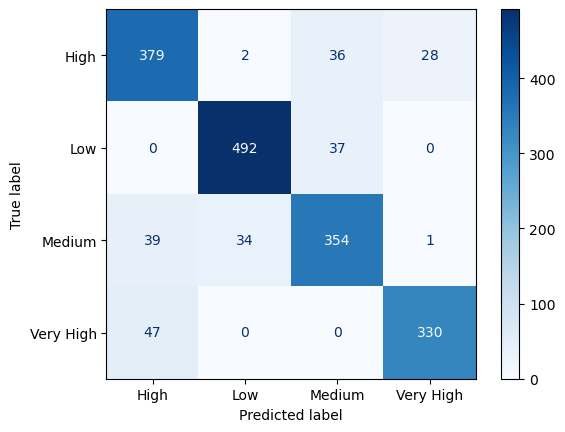

In [102]:
train_and_evaluate_model('Random Forest',return_model=False)

### Conclusion

From this project,we uncovered significant information such as:

1. Finance had the highest number of reviews followed by books and references then health and fitnesss.

2. Paid apps were rated higher.

3. Most of the installed apps are in the marked range from 0 to around (12MB).

4. Game, Family and Sports categories have higher averages sizes in KB, ranging from 20000 to 40000 KB.

5. Apps with a higher number of reviews tend to have more installs, indicating a positive relationship between user engagement and app popularity.

6. larger apps may attract more user feedback, possibly due to their increased functionality or complexity.

7. Random Forests, at 88%, are the most precise of the five classification models, closely followed by XGBoost at 87%, and then decision trees at 86%.Consequently, 88% of the time we can reliably and precisely classify an app into low, medium, high, and very high using the Random Forest model. When utilizing the Random Forest mode with the reviews as the most important feature.

8. Key Features:The following are the top 5 prominent features of the Random Forests Model:

a. Reviews

b. Size (KB)

c. Rating

d. Version_binned

e. Year Last Up

These insights underscore the importance of aligning app development strategies with market demand and user expectations. Additionally, observations on app sizes highlight the critical role of optimization in enhancing user experience and mitigating barriers to adoption.

### Recommendations

Optimize App Installations: Pay attention to factors influencing app installations. By taking into consideration features that have a strong correlation with the number of installs ap developers will be able to optimize app descriptions, screenshots, and othe r promotion l materials to attract more users and increase app installatio

Enhance User Experience: Prioritize providing a positive user experience within your apps. Consider factors such as app size, performance, and compatibility with different Androin. Optimizing these aspects can contribute to higher user satisfaction and positive app ratin

Stay Updated on Market Trends: Continuously monitor market trends within the Google Play Store ecosystem. Identify emerging app categories and changes in user preferences over time. This information can help you stay ahead of the curve and align your app development and marketing strategies with the evolving needs and interests of s..ns.

### Next Steps

Moving forward we suggest the following steps :
1) Collaborate with Marketers and Stakeholders: Share the findings and insights from the analysis with marketers and stakeholders. Collaborate with marketing teams to develop targeted promotional campaigns based on user preferences and market trends. Engage with stakeholders to align app development strategies with business objectives and market demands.

2) Explore User Segmentation: Segment the user base based on different characteristics such as demographics, preferences, and behavior patterns. Analyze how different user segments interact with apps and identify specific needs and preferences. This information can guide personalized app development and targeted marketing efforts.

3) Refine the Machine Learning Model: Evaluate and refine the machine learning model developed for predicting app success and classifying app installations. Consider exploring different algorithms, tuning hyperparameters, and performing feature selection to improve the model's accuracy and performance.